# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [1]:
#Import the Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline

#Display all columns and 500 rows
# Adding code to see all the columns of data set
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',500)

# Reading and understanding the Data - EDA

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Check the shape of the dataset
df.shape

(1460, 81)

# Data Cleaning - Missing value treatment

In [5]:
#Check percentage of null values in each column

null_percent = round(df.isnull().sum()/len(df)*100,2)

missing_data = pd.DataFrame({'column_name':df.columns,'missing_percentage':null_percent})
missing_data

,column_name,missing_percentage
Id,Id,0.00
MSSubClass,MSSubClass,0.00
MSZoning,MSZoning,0.00
LotFrontage,LotFrontage,17.74
LotArea,LotArea,0.00
Street,Street,0.00
Alley,Alley,93.77
LotShape,LotShape,0.00
LandContour,LandContour,0.00
Utilities,Utilities,0.00


In [6]:
#After visual inspection of the comuns that have more than 90% null (NA) values, we found that they are actually not null values,
#NA in this context have some meaning, so we are not dropping these columns, but instead replacing the 'NA' with more meaningful
#value, these columns with current NA values and new values are as below:
# Alley---> NA --->NoAlley
# PoolQC --->NA ---> NoPool
# Fence ---> NA --->NoFence
# MiscFeature --->NA ---> NoMisc
# FireplaceQu ---> NA ---> NoFirePlace
# GarageFinish,GarageCond,GarageYrBlt,GarageQual,GarageType ---> NA ---> NoGarage
# BsmtFinType2, BsmtExposure,BsmtFinType1,BsmtQual,BsmtCond ---> NA ---> NoBsmt

df['Alley'].fillna('NoAlley',inplace = True)
df['PoolQC'].fillna('NoPool',inplace = True)
df['Fence'].fillna('NoFence',inplace = True)
df['MiscFeature'].fillna('NoMisc',inplace = True)
df['FireplaceQu'].fillna('NoFirePlace',inplace = True)
df['GarageFinish'].fillna('NoGarage',inplace = True)
df['GarageCond'].fillna('NoGarage',inplace = True)
df['GarageYrBlt'].fillna(0,inplace = True) #Since its a numerical feature
df['GarageQual'].fillna('NoGarage',inplace = True)
df['GarageType'].fillna('NoGarage',inplace = True)
df['BsmtFinType2'].fillna('NoBsmt',inplace = True)
df['BsmtExposure'].fillna('NoBsmt',inplace = True)
df['BsmtFinType1'].fillna('NoBsmt',inplace = True)
df['BsmtQual'].fillna('NoBsmt',inplace = True)
df['BsmtCond'].fillna('NoBsmt',inplace = True)

In [7]:
#After this replacement let's check the missing percetage
null_percent = round(df.isnull().sum()/len(df)*100,2)

missing_data = pd.DataFrame({'column_name':df.columns,'missing_percentage':null_percent})
missing_data.sort_values(by='missing_percentage',ascending=False)

,column_name,missing_percentage
LotFrontage,LotFrontage,17.74
MasVnrType,MasVnrType,0.55
MasVnrArea,MasVnrArea,0.55
Electrical,Electrical,0.07
KitchenQual,KitchenQual,0.00
GarageYrBlt,GarageYrBlt,0.00
GarageType,GarageType,0.00
FireplaceQu,FireplaceQu,0.00
Fireplaces,Fireplaces,0.00
Functional,Functional,0.00


In [8]:
#Find the number of rows which has MasVnrType, MasVnrArea or Electrical as null
df[df['MasVnrType'].isnull() | df['MasVnrArea'].isnull() | df['Electrical'].isnull()]

#It seems like we have only 9 such rows which is 0.6% of the total data, so let's drop these rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NoPool,NoFence,NoMisc,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NoFirePlace,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NoFirePlace,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NoPool,NoFence,NoMisc,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NoFirePlace,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NoPool,NoFence,NoMisc,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NoFirePlace,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NoPool,NoFence,NoMisc,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NoPool,NoFence,NoMisc,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NoPool,NoFence,NoMisc,0,3,2008,WD,Normal,237000
1379,1380,80,RL,73.0,9735,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NoFirePlace,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2008,WD,Normal,167500


In [9]:
df = df[~(df['MasVnrType'].isnull() | df['MasVnrArea'].isnull() | df['Electrical'].isnull())]

In [10]:
df.shape

(1451, 81)

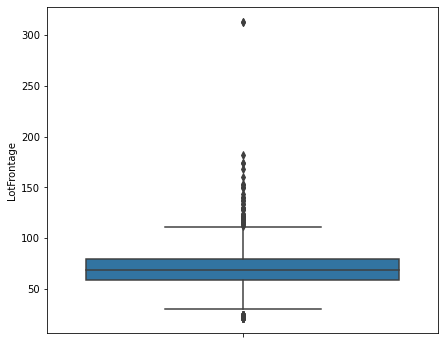

In [11]:
#Now we have all the columns with non null values except LotFrontage, let's see what we can do with this column
#Analyze the LotFrontage column
plt.figure(figsize=(7,6))
sns.boxplot(y=df.LotFrontage)
plt.show()

#As we can see that there are some outliers in this variable, so let's replace the missing values in this field with the median
#value

In [12]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace = True)

In [13]:
df['LotFrontage'].isnull().sum()
#So, now we dont have any missing values in the data

0

# Data Quality and other data checks

Data type check and convert the features into correct data type

In [14]:
#df.info()
#Categorical Data types
categorical_features = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                        'Neighborhood','Condition1','Condition2','BldgType','HouseStyle', 'OverallQual','OverallCond','RoofStyle','RoofMatl',
                        'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                        'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
                        'Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                        'KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars',
                        'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

#Set the datatype of these columns as categorical
df[categorical_features] = df[categorical_features].astype('category')
#Create a list for numerical features using list comprehension
numerical_features = [x for x in df.columns if x not in categorical_features]
numerical_features

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1451 non-null   int64   
 1   MSSubClass     1451 non-null   category
 2   MSZoning       1451 non-null   category
 3   LotFrontage    1451 non-null   float64 
 4   LotArea        1451 non-null   int64   
 5   Street         1451 non-null   category
 6   Alley          1451 non-null   category
 7   LotShape       1451 non-null   category
 8   LandContour    1451 non-null   category
 9   Utilities      1451 non-null   category
 10  LotConfig      1451 non-null   category
 11  LandSlope      1451 non-null   category
 12  Neighborhood   1451 non-null   category
 13  Condition1     1451 non-null   category
 14  Condition2     1451 non-null   category
 15  BldgType       1451 non-null   category
 16  HouseStyle     1451 non-null   category
 17  OverallQual    1451 non-null   ca

In [16]:
#Check duplicates
df.duplicated().sum()
#There are no suplicates in the dataset

0

In [17]:
#Drop the id column, as it is of no use for prediction
df.drop('Id',axis = 1,inplace = True)

Mode percentage for each categorical variable, i.e. how many categorical variables have same value for most of the rows

In [18]:
mode_perc = []

for i in categorical_features:
    mode_perc.append(round(df[i].value_counts()[0]/len(df[i])*100,2))

mode = pd.DataFrame({'col_name': categorical_features,'mode_perc':mode_perc})
mode.sort_values(by='mode_perc',ascending = False)

,col_name,mode_perc
6,Utilities,99.93
2,Street,99.59
50,PoolQC,99.52
11,Condition2,98.97
17,RoofMatl,98.21
29,Heating,97.79
52,MiscFeature,96.28
38,KitchenAbvGr,95.38
8,LandSlope,94.62
34,BsmtHalfBath,94.35


Let's drop the ones which has more than 80% same value i.e. mode 

In [19]:
drop_cols = mode[mode['mode_perc']>80]
drop_list = list(drop_cols['col_name'])
df.drop(drop_list,axis = 1,inplace = True)

In [20]:
df.shape

(1451, 54)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1451 non-null   category
 1   MSZoning       1451 non-null   category
 2   LotFrontage    1451 non-null   float64 
 3   LotArea        1451 non-null   int64   
 4   LotShape       1451 non-null   category
 5   LotConfig      1451 non-null   category
 6   Neighborhood   1451 non-null   category
 7   HouseStyle     1451 non-null   category
 8   OverallQual    1451 non-null   category
 9   OverallCond    1451 non-null   category
 10  YearBuilt      1451 non-null   int64   
 11  YearRemodAdd   1451 non-null   int64   
 12  RoofStyle      1451 non-null   category
 13  Exterior1st    1451 non-null   category
 14  Exterior2nd    1451 non-null   category
 15  MasVnrType     1451 non-null   category
 16  MasVnrArea     1451 non-null   float64 
 17  ExterQual      1451 non-null   ca

In [22]:
#Function to recalcuate the list of categorical and numerical features everytime we drop or add a variable

def recalculate_feature_list(df):

    numerical_features =  [x for x in df.columns if (df[x].dtype == 'int64' or df[x].dtype == 'float64' or df[x].dtype == 'object')]
    categorical_features =  [x for x in df.columns if (df[x].dtype != 'int64' and df[x].dtype != 'float64' and df[x].dtype != 'object')]
    return(categorical_features,numerical_features)

In [23]:
categorical_features, numerical_features = recalculate_feature_list(df)

# EDA Univariate and Bivariate Analysis

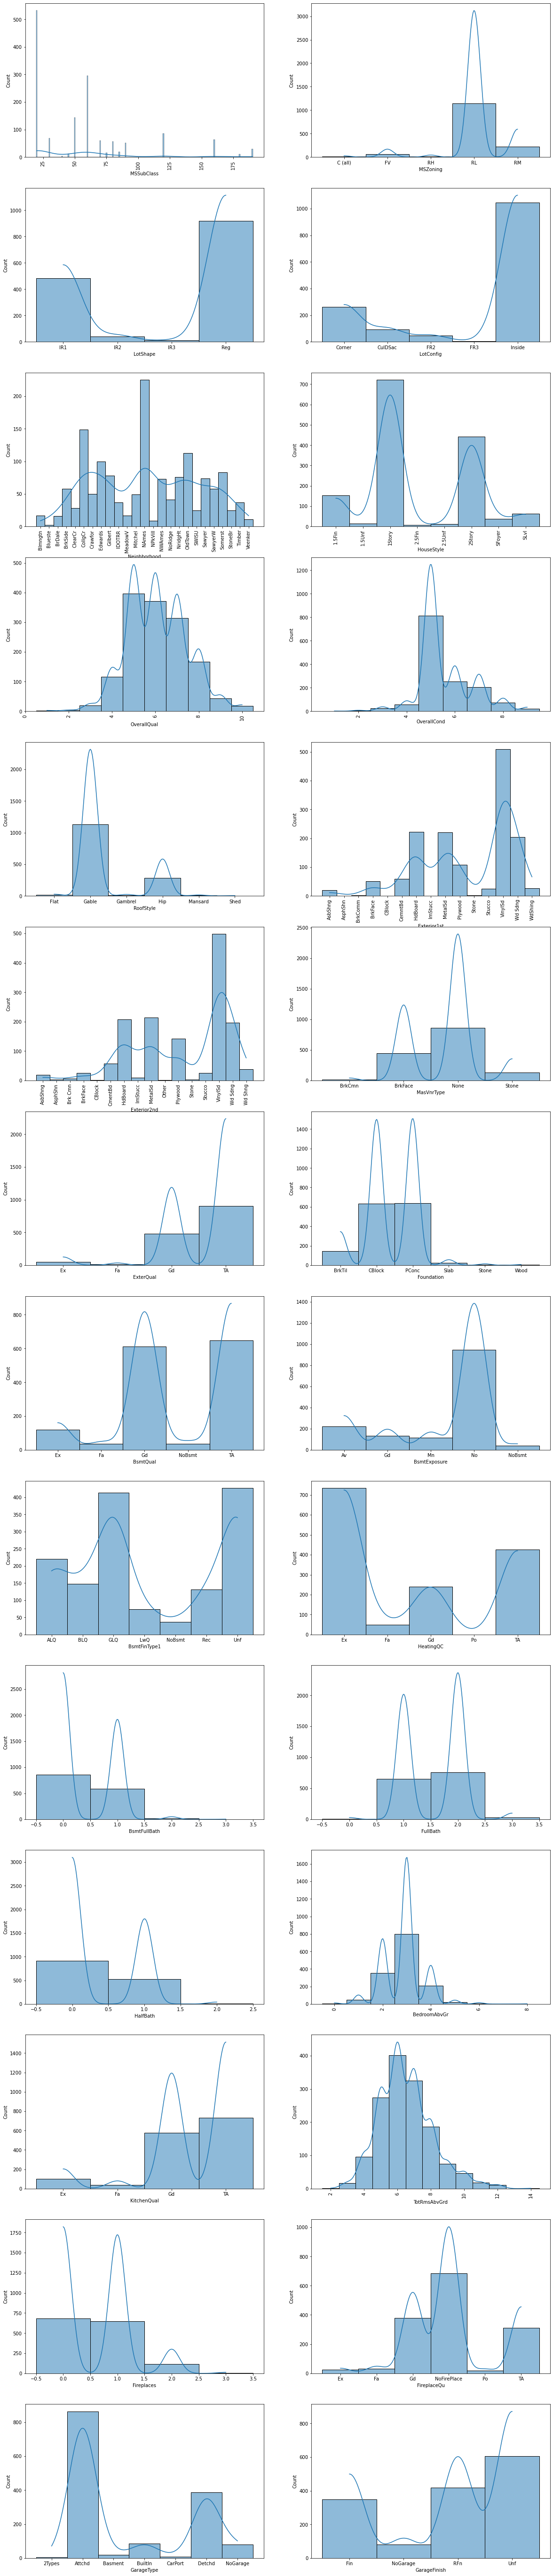

In [24]:
# Univariate Analysis of all the categorical variables using histogram
    
plt.figure(figsize=(20,100))

for i in range(1,len(categorical_features)):
    plt.subplot(len(categorical_features)//2,2,i)
    sns.histplot(df[categorical_features[i-1]],kde=True)
    if len(df[categorical_features[i-1]].unique())>7:
        plt.xticks(rotation=90)
plt.show()

There are multiple ordered categorical variables involved. 

[OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,
FireplaceQu,GarageQual,GarageCond,PoolQC,Fence]

Ordinal variables are fundamentally categorical. So we have two options now:
1. Treat them just like any other categorical variable as it will be simple and also doesn't violate any assumptions. 
2. Treat them as continuous variables so that the ordered nature of these variables is considered into the analysis. 

I have tried both separately tried both the options and the results are not much different, so we are going with option 1.  

Other categorical variables are regular in nature, nothing specific to mention. 

# Bivariate Analysis of the categorical variables with the sale price

Plot the sale price against the categorical variables in one chart

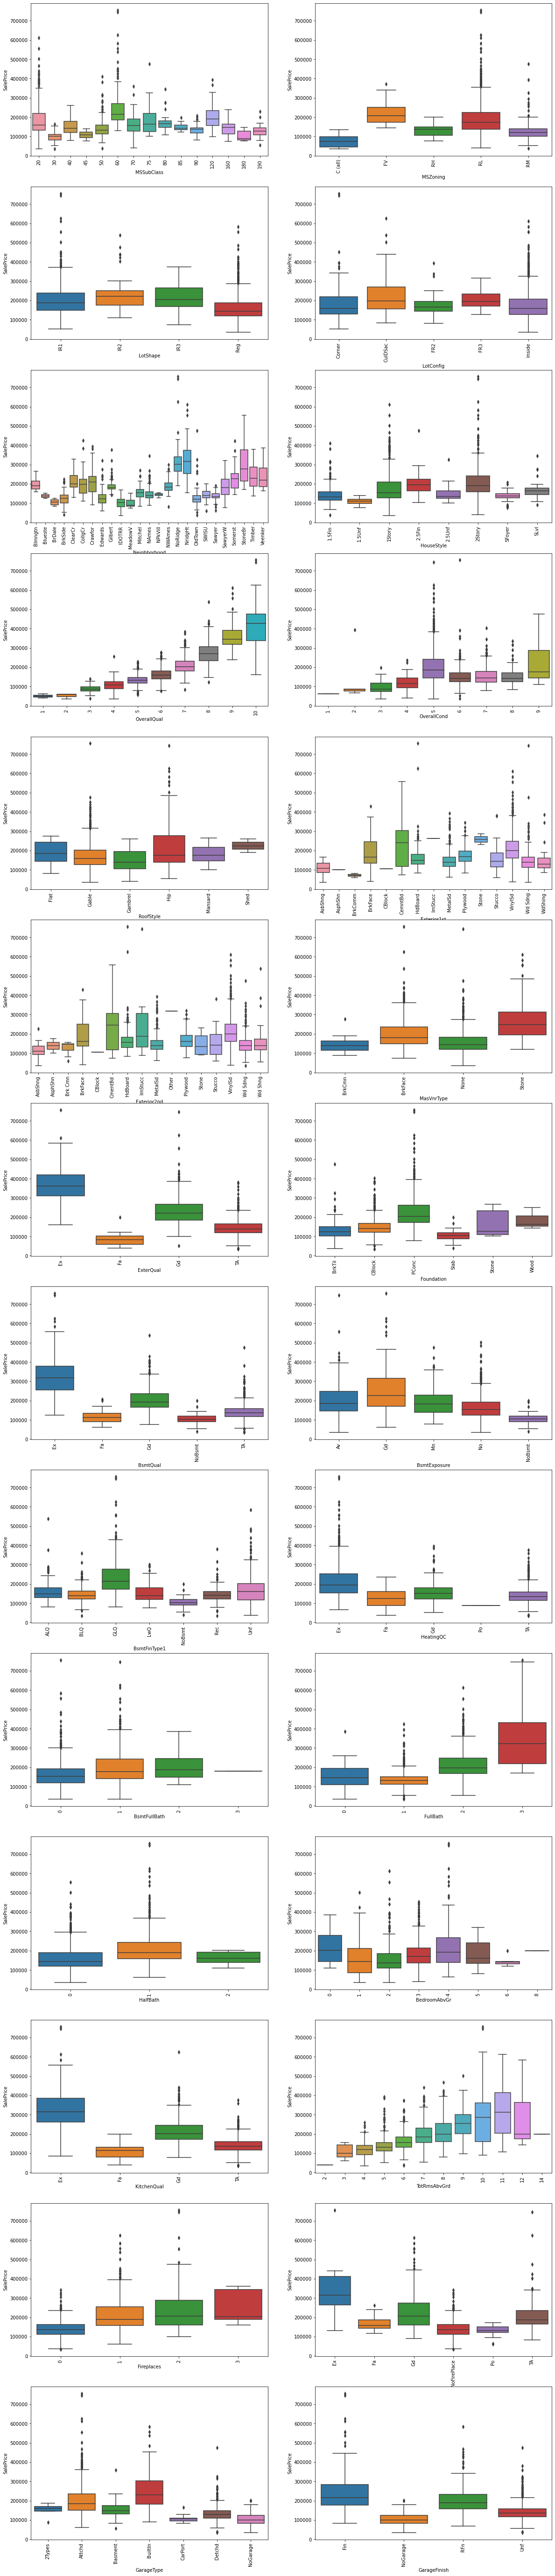

In [25]:
plt.figure(figsize=(20,100))

for i in range(1,len(categorical_features)):
    plt.subplot(len(categorical_features)//2,2,i)
    sns.boxplot(data = df, x = df[categorical_features[i-1]], y = df['SalePrice'])
    plt.xticks(rotation=90)
#fig.tight_layout()
plt.show()

Observation: With almost all the categorical variables, we could see that the target variable i.e. the house prices are changing, hence we can't drop any more categorical variable based on the visualization of the box plots above.

# Process Numerical variables and outlier treatment

In [26]:
from datetime import date
todays_date = date.today()
#Age of the building
df['PropertyAge'] = todays_date.year - df['YearBuilt']
df['YearsSinceRemodel'] = todays_date.year - df['YearRemodAdd']
df['GarageAge'] = todays_date.year - df['GarageYrBlt']
df['YearsSinceSold'] = todays_date.year - df['YrSold']

In [27]:
#Delete YearBuilt, YearRemodAdd, GarageYrBlt,YrSold and MoSold
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis = 1, inplace = True)

In [28]:
categorical_features, numerical_features = recalculate_feature_list(df)

In [29]:
#Fix GarageAge
df['GarageAge'] = df['GarageAge'].apply(lambda x: x if x!=2022 else 0)

In [30]:
df[numerical_features].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,YearsSinceRemodel,GarageAge,YearsSinceSold
count,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,69.845624,10507.808408,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,180624.101999,50.907650,37.239835,41.210200,14.184700
std,22.044429,9992.987081,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,79312.128273,30.190266,20.651334,25.996643,1.329376
min,21.000000,1300.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,12.000000,12.000000,0.000000,12.000000
25%,60.000000,7537.500000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000,22.000000,18.000000,19.000000,13.000000
50%,69.000000,9477.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162500.000000,50.000000,29.000000,38.000000,14.000000
75%,79.000000,11600.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,68.000000,56.000000,60.000000,15.000000
max,313.000000,215245.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,150.000000,72.000000,122.000000,16.000000


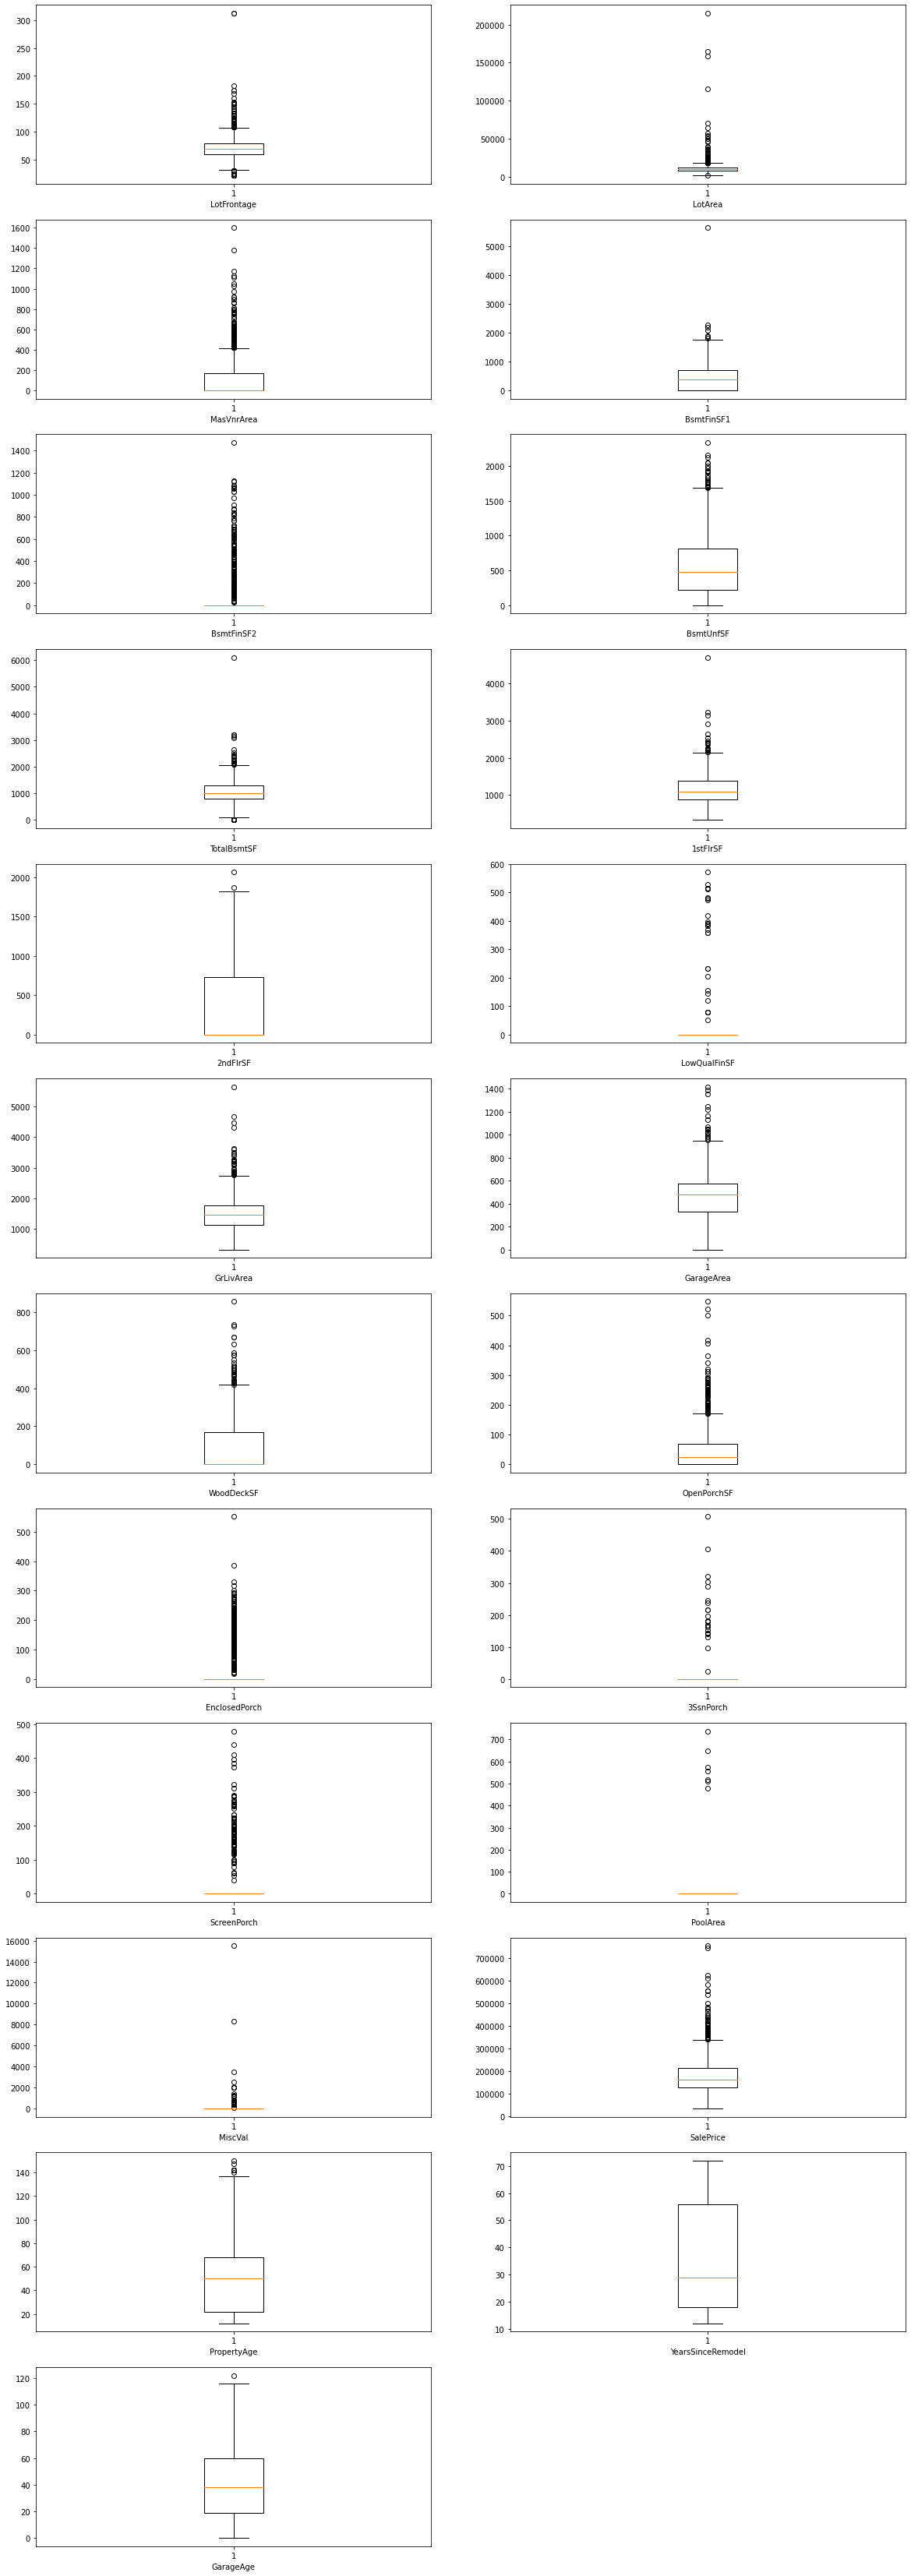

In [31]:
#PLot boxplots for the numerical variables to visualize the outliers  
plt.figure(figsize=(20,60))

for i in range(1,len(numerical_features)):
    plt.subplot(len(numerical_features)//2,2,i)
    plt.boxplot(df[numerical_features[i-1]])
    plt.xlabel(numerical_features[i-1])
plt.show()

In [32]:
#Lets remove the outlier data based on the LotArea
#Outlier removal function
def remove_outliers(df,col_name):
    q1 = df[col_name].quantile(.25)
    q3 = df[col_name].quantile(.75)
    iqr = q3-q1

    df = df[(df[col_name] > q1-1.5*iqr) & (df[col_name] < q3+1.5*iqr)]
    return df

df = remove_outliers(df,'LotArea')
df = remove_outliers(df,'MasVnrArea')
#df = remove_outliers(df,'BsmtFinSF2')
#df = remove_outliers(df,'EnclosedPorch')
#df = remove_outliers(df,'ScreenPorch')

In [33]:
df.shape

(1296, 53)

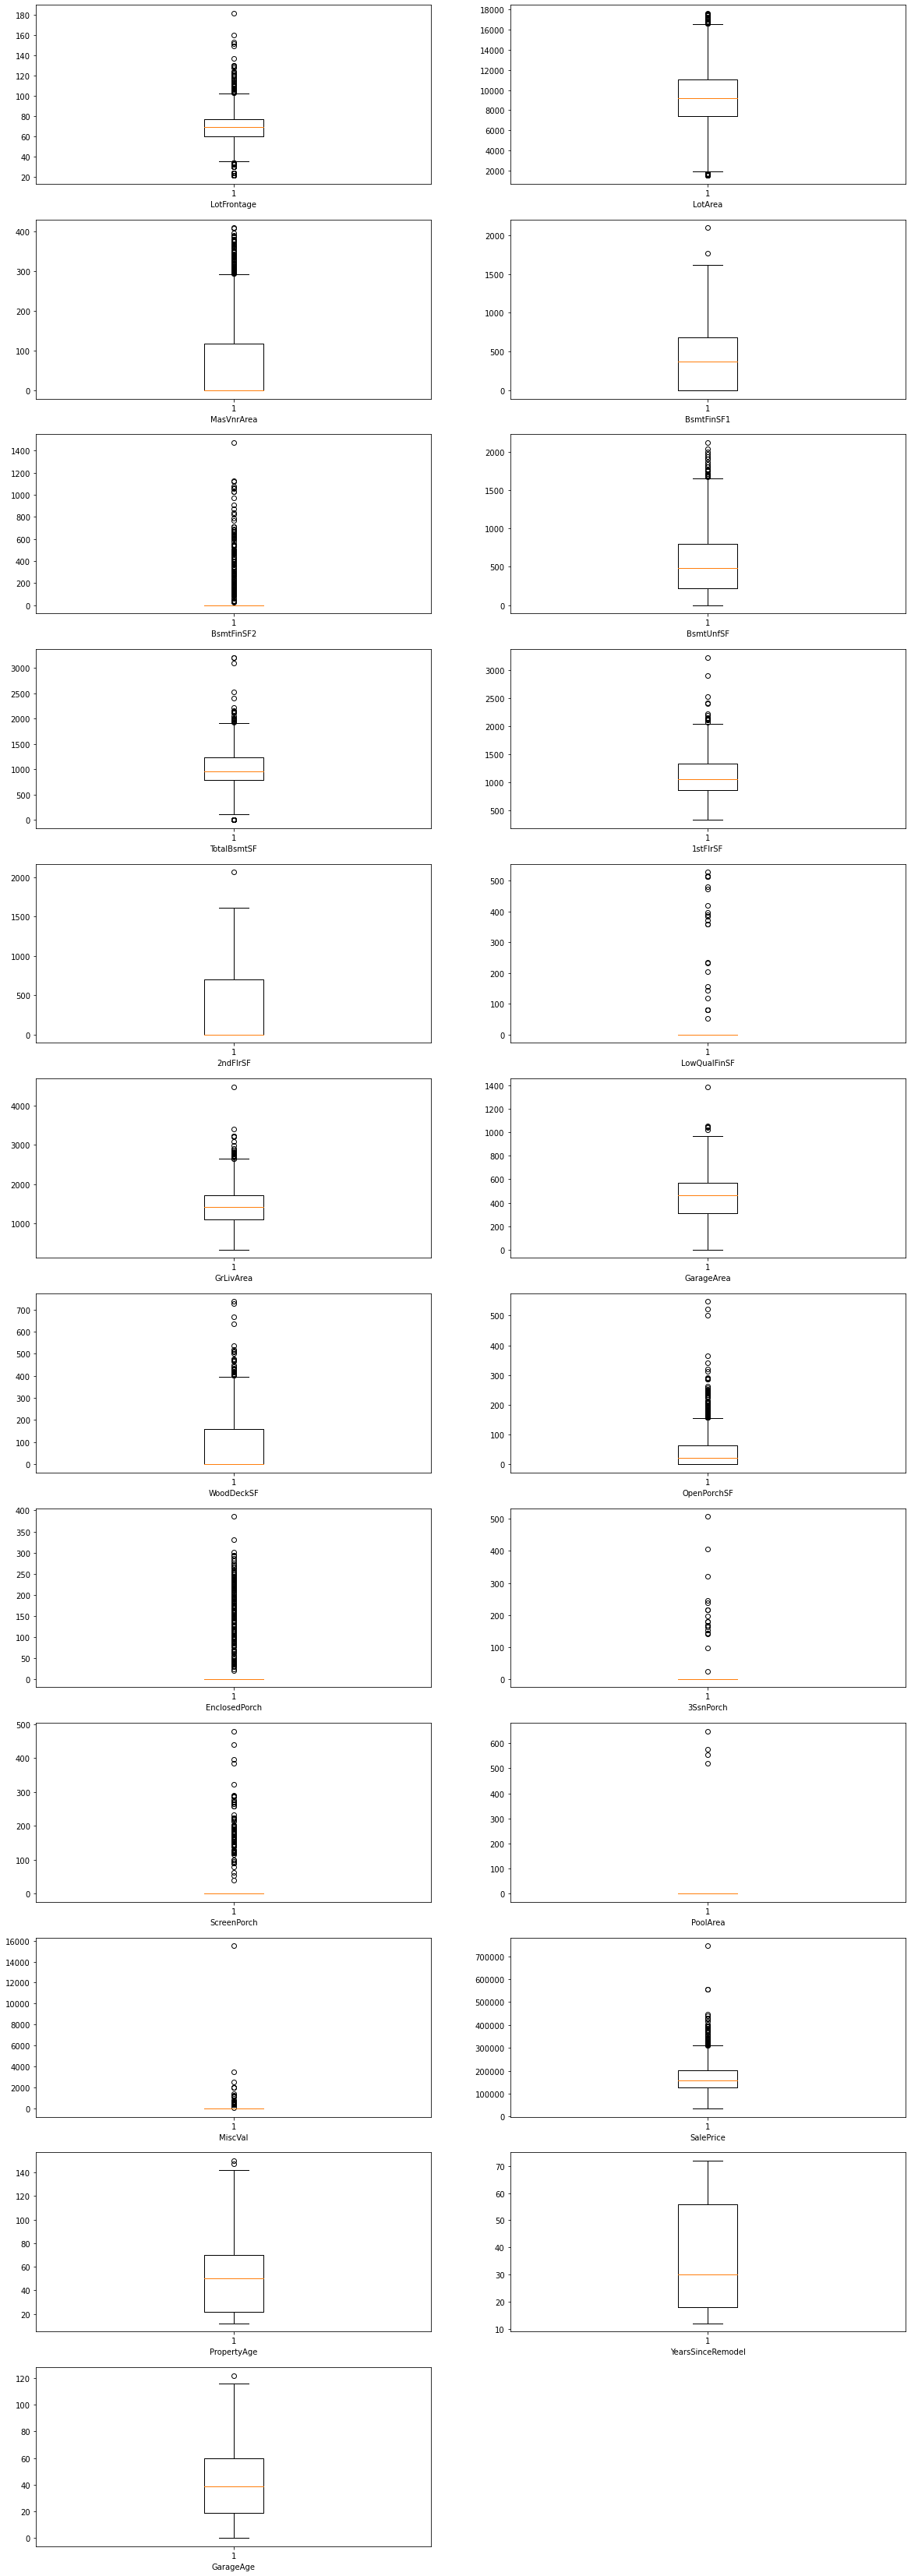

In [34]:
#PLot boxplots for the numerical variables to visualize the outliers  
plt.figure(figsize=(20,60))

for i in range(1,len(numerical_features)):
    plt.subplot(len(numerical_features)//2,2,i)
    plt.boxplot(df[numerical_features[i-1]])
    plt.xlabel(numerical_features[i-1])
plt.show()

We can see that the outlier situation has improved, but since we have limited data let's proceed with the current data.

In [35]:
df.shape
#We have discarded 76 data points out of a total of 1460 data points so far which is around 5% of the total dataset

(1296, 53)

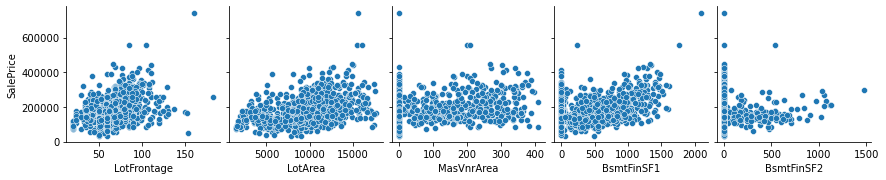

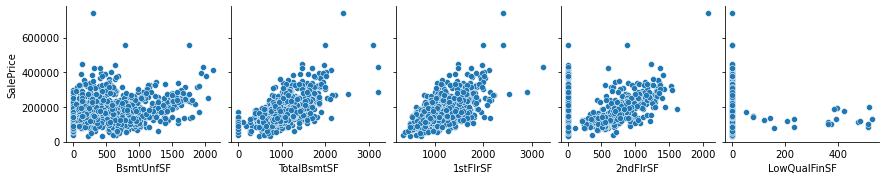

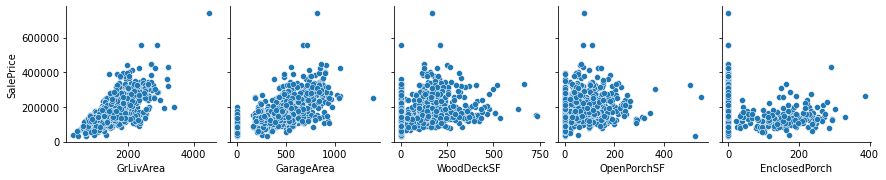

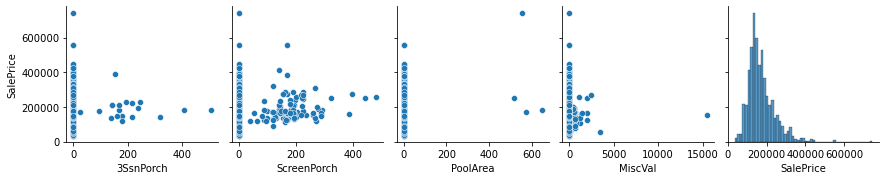

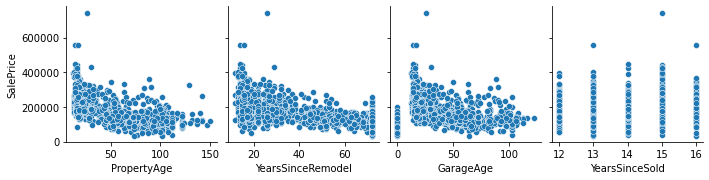

In [36]:
#Visualizing numeric variable pairplot to see how they are correlated

sns.pairplot(data = df, x_vars = numerical_features[0:5], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[5:10], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[10:15], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[15:20], y_vars = ['SalePrice'])
plt.show()
sns.pairplot(data = df, x_vars = numerical_features[20:25], y_vars = ['SalePrice'])
plt.show()
#sns.pairplot(data = df, x_vars = numerical_variables[25:30], y_vars = ['SalePrice'])
#plt.show()

Observation - We could see that there are a number of numerical variables which are linearly correlated with the target variable i.e. SalePrice. Some are positively correlated and some even negatively correlated, this satisfies one of the requirement to use linear reqgression that Target variable should be linearly related with the predictor variables. 

In [37]:
#Drop PoolArea,MiscVal,3SsnPorch,LowQualFinSF as most of the data points have this columns as 0. 
#So they won't have much impact on the final model
df.drop(['PoolArea','MiscVal','3SsnPorch','LowQualFinSF'],axis = 1, inplace = True)

In [38]:
categorical_features, numerical_features = recalculate_feature_list(df)

In [39]:
numerical_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice',
 'PropertyAge',
 'YearsSinceRemodel',
 'GarageAge',
 'YearsSinceSold']

<AxesSubplot:>

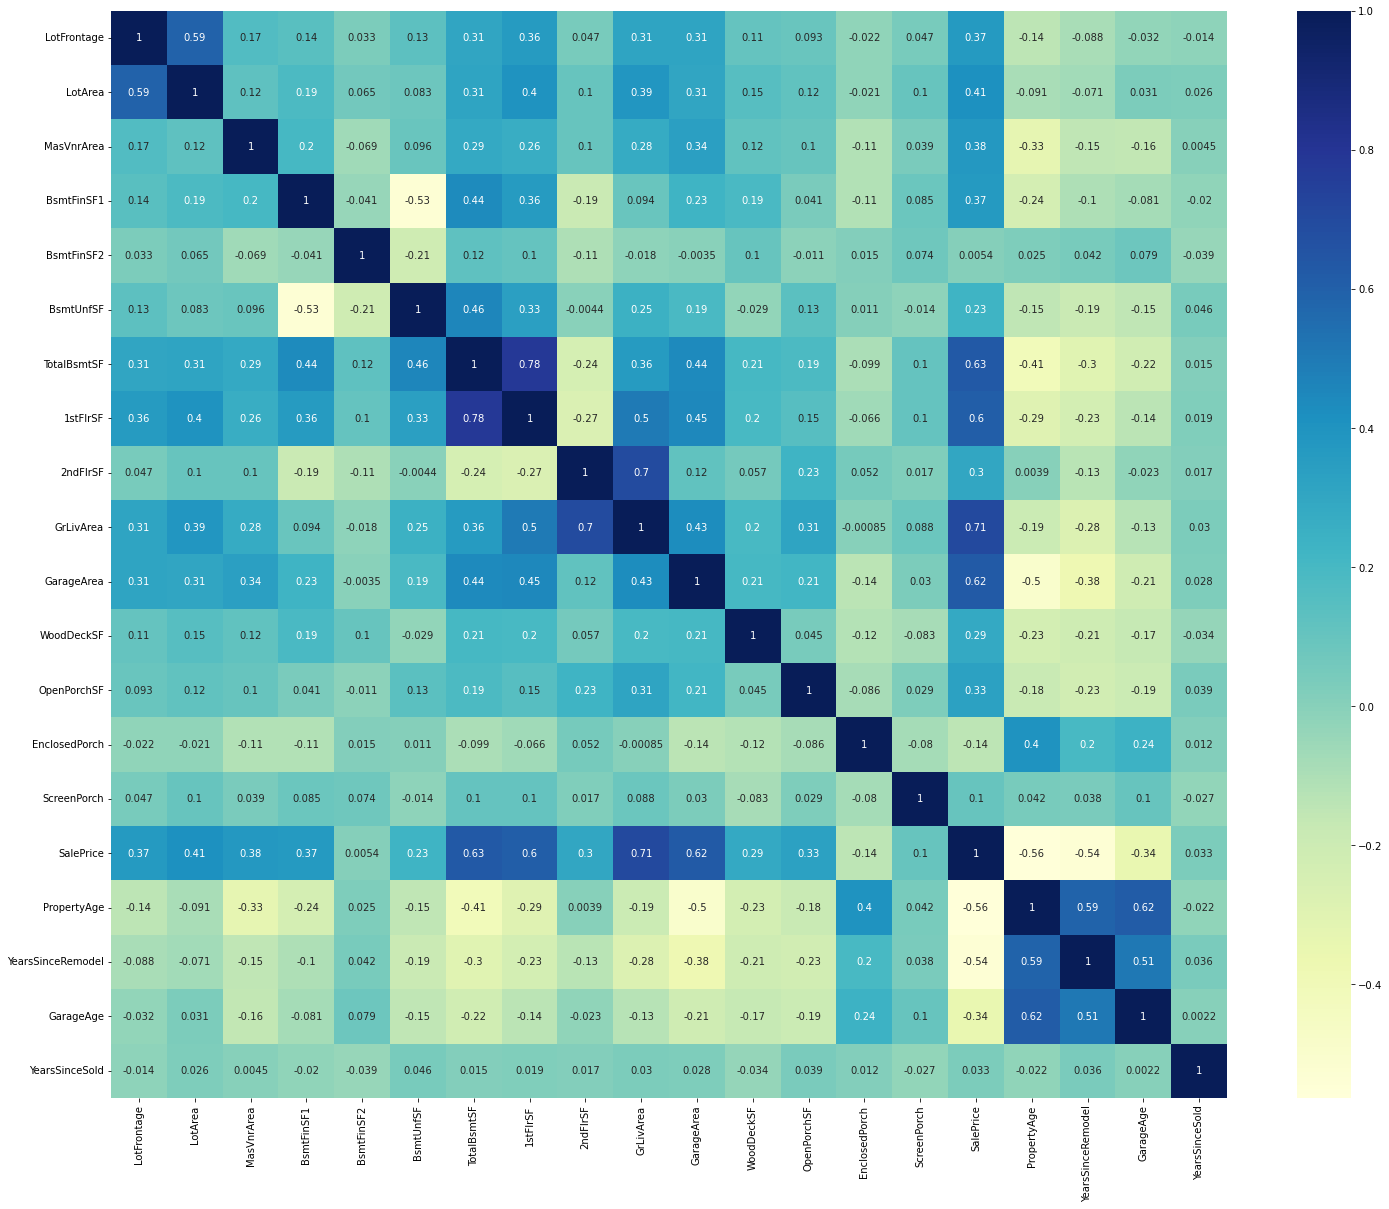

In [40]:
plt.figure(figsize=(25,20))
sns.heatmap(df[numerical_features].corr(),annot = True,cmap="YlGnBu")

In [41]:
df.drop('TotalBsmtSF',axis=1,inplace = True)
#Drop TotalBsmtSF as it has a correlation of 81% with 1stFlrSF

In [42]:
categorical_features, numerical_features = recalculate_feature_list(df)

In [43]:
df.shape

(1296, 48)

In [44]:
#Onehot encoding for categorical variables, using the below for loop code
for i in categorical_features:
    #Create dummies 
    temp = pd.get_dummies(df[i],drop_first=True,prefix = i)
    
    #Concat original dataframe with the new encoded datasets
    df = pd.concat([df,temp],axis =1)
    
    #Drop the columns for which dummy variables have been created
    df = df.drop(i,axis =1)

In [45]:
df.shape

(1296, 205)

In [46]:
import sklearn
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,train_size=0.7, random_state=100)

In [47]:
#Scale the numerical variables

from sklearn.preprocessing import MinMaxScaler

#Instantiate an object

scaler = MinMaxScaler()

# Fit on data (only numeric variables)
num_vars = numerical_features

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,PropertyAge,YearsSinceRemodel,GarageAge,YearsSinceSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
663,0.496403,0.527047,0.000000,0.438931,0.122117,0.018609,0.292674,0.0,0.204491,0.423022,0.000000,0.0,0.466321,0.0,0.144487,0.292308,0.633333,0.413793,0.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
253,0.460432,0.486168,0.272727,0.128817,0.393487,0.221352,0.334485,0.0,0.233704,0.222302,0.452446,0.0,0.000000,0.0,0.173356,0.353846,0.316667,0.500000,0.75,0,0,0,0,0,0,0,1,0,0,0,0,0

In [48]:
df_train.shape

(907, 205)

# Training the model -Using the basic Linear regression model

In [49]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [50]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [51]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

307350335584.1545
[-1.26653580e-02  3.85168219e-02  8.22398486e-03  1.00552283e-01
  6.01141295e-02  6.82921031e-02  7.48707860e-02  6.72080601e-02
  1.72978945e-01  1.07004937e-02  5.26540243e-03 -1.63090879e-02
 -9.19738153e-05  2.15970539e-02 -1.00922899e-01 -1.32764785e-02
 -1.01976310e-02  6.03718337e-03  3.65354818e-03  2.49823553e+11
 -2.54634990e-03 -1.24952423e-02 -1.14774644e-02 -2.13091523e-02
 -2.61723169e-02 -3.87290950e-02 -6.63920667e-03 -2.87820219e-02
 -2.11738017e-02 -4.49901217e-02 -5.35162825e-02 -2.42535381e-02
  5.08883128e-02  4.88399269e-02  5.24744598e-02  4.23707298e-02
 -5.20205505e-03  1.76392182e-02  2.70203304e-03  8.16639061e-03
 -1.00588294e-02 -3.17268416e-02 -3.96982167e-03  2.22191555e+11
  2.74857309e-02  2.58357333e-02 -8.77689639e-03 -1.46620939e-02
  5.26377080e-02 -1.36873653e-02 -1.62681016e-02  1.84601512e-02
 -9.85913679e-03 -2.97435175e-02 -7.06091433e-03 -6.84148072e-04
 -1.78287063e-02  1.11882327e-02  9.93001015e-03  7.52155644e-03
  7.443

In [52]:
#Test the model with the test data

In [53]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [54]:
y_test = df_test.pop('SalePrice')

X_test = df_test

In [55]:
y_test.shape

(389,)

In [56]:
y_test_predicted = lm.predict(X_test)

In [57]:
#Write a function to calculate the metrices, instead of writing the same code everytime. 
# Input  - X_train,X_test,y_train,y_test,y_pred_train,y_pred_test
# Output - Prints below information as output and returns a List containing the metrices in the following order
#          - Train R2
#          - Test R2
#          - Train RSS
#          - Test RSS
#          - Train RMSE
#          - Test RMSE

def calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test):

    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print('R2 train:',r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print('R2 test:',r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print('RSS train:',rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print('R2 test:',rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print('MSE train:',mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print('MSE test:',mse_test_lr)
    metric.append(mse_test_lr**0.5)

    return metric

In [58]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric_lr = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

R2 train: 0.9310176820639775
R2 test: -2.102705100571539e+23
RSS train: 0.5767659313305733
R2 test: 7.415247272455977e+23
MSE train: 0.0006359051062079089
MSE test: 1.9062332319938243e+21


As we can see here that the R2 of the training set is very good i.e. 93%, but for the test set it is practically a zero value. Its a clear case of overfitting. Reason looks like very high number of input features. We can definitely say that this model can't be used. Let's try one more generic model where we try to reduce the number of features using RFE, and see if it helps. 

# Model Using RFE, let's also try to use RFE to see if we can improve the overfitting situation that happened in the Linear regression model.

In [59]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 108),
 ('LotArea', False, 5),
 ('MasVnrArea', False, 120),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('1stFlrSF', False, 145),
 ('2ndFlrSF', False, 72),
 ('GrLivArea', True, 1),
 ('GarageArea', False, 160),
 ('WoodDeckSF', False, 126),
 ('OpenPorchSF', False, 159),
 ('EnclosedPorch', False, 190),
 ('ScreenPorch', False, 99),
 ('PropertyAge', True, 1),
 ('YearsSinceRemodel', False, 74),
 ('GarageAge', False, 115),
 ('YearsSinceSold', False, 150),
 ('MSSubClass_30', False, 168),
 ('MSSubClass_40', False, 44),
 ('MSSubClass_45', False, 90),
 ('MSSubClass_50', False, 131),
 ('MSSubClass_60', False, 143),
 ('MSSubClass_70', False, 130),
 ('MSSubClass_75', False, 167),
 ('MSSubClass_80', False, 100),
 ('MSSubClass_85', False, 127),
 ('MSSubClass_90', False, 58),
 ('MSSubClass_120', False, 104),
 ('MSSubClass_160', False, 63),
 ('MSSubClass_180', False, 105),
 ('MSSubClass_190', False, 98),
 ('MSZoning_FV', False, 22),
 ('MSZoning_RH

In [61]:
col = X_train.columns[rfe.support_]

In [62]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,GrLivArea,PropertyAge,Neighborhood_Crawfor,OverallQual_8,OverallQual_9,OverallQual_10,BedroomAbvGr_8,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_NoGarage
663,0.438931,0.122117,0.018609,0.204491,0.292308,0,0,0,0,0,0,0,0,1,0
253,0.128817,0.393487,0.221352,0.233704,0.353846,0,0,0,0,0,1,0,0,0,0
1005,0.283874,0.000000,0.190989,0.157170,0.253846,0,0,0,0,0,1,0,0,0,0
680,0.259065,0.080733,0.127816,0.142202,0.230769,0,0,0,0,0,1,0,0,0,0
194,0.186069,0.000000,0.232125,0.127958,0.292308,0,0,0,0,0,0,0,0,1,0


In [63]:
lm_rfe = LinearRegression()
lm_rfe.fit(X_train_rfe,y_train)

LinearRegression()

In [64]:
print(lm_rfe.intercept_)
print(lm_rfe.coef_)

0.024350955418856124
[ 0.13378349  0.0648039   0.07472083  0.36945725 -0.10879296  0.06238654
  0.06507237  0.13791869  0.24672197 -0.0649886   0.04248147  0.05293031
  0.02140483  0.0379115   0.0207802 ]


In [65]:
y_train_predict_rfe = lm_rfe.predict(X_train_rfe)

In [66]:
r2_score(y_train,y_train_predict_rfe)

0.861275720959717

In [67]:
X_test_rfe = X_test[col]
y_test_predict_rfe = lm_rfe.predict(X_test_rfe)

In [68]:
r2_score(y_test,y_test_predict_rfe)

0.8591908987678099

In [69]:
#Using statsmodels, so that we can see more metrices i.e. P values etc. 
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr_sm = sm.OLS(y_train,X_train_rfe_sm)

lr_model = lr_sm.fit()
final_model = lr_model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     368.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:27:14   Log-Likelihood:                 1734.2
No. Observations:                 907   AIC:                            -3436.
Df Residuals:                     891   BIC:                            -3359.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0244      0.011      2.130      0.033       0.002       0.047
BsmtFinSF1                0.1338      0.009     14.658      0.000       0.116       0.152
BsmtFinSF2                0.0648      0.011      5.654      0.000       0.042       0.087
BsmtUnfSF                 0.0747      0.009      8.751      0.000       0.058       0.091
GrLivArea                 0.3695      0.013     28.667      0.000       0.344       0.395
PropertyAge              -0.1088      0.007    -15.458      0.000      -0.123      -0.095
Neighborhood_Crawfor      0.0624      0.007      8.989      0.000       0.049       0.076
OverallQual_8             0.0651      0.005     14.338      0.000       0.056       0.074
OverallQual_9             0.1379      0.009     15.055      0.000       0.120       0.156
OverallQual_10            0.2467      0.017     14.504      0.000       0.213       0.280
BedroomAbvGr_8           -0.0650      0.037     -1.752      0.080      -0.138       0.008
GarageType_Attchd         0.0425      0.010      4.135      0.000       0.022       0.063
GarageType_BuiltIn        0.0529      0.011      4.604      0.000       0.030       0.075
GarageType_CarPort        0.0214      0.019      1.121      0.262      -0.016       0.059
GarageType_Detchd         0.0379      0.010      3.671      0.000       0.018       0.058
GarageFinish_NoGarage     0.0208      0.011      1.846      0.065      -0.001       0.043
==============================================================================
Omnibus:                      139.717   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              815.827
Skew:                           0.549   Prob(JB):                    7.01e-178
Kurtosis:                       7.515   Cond. No.                         41.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that we have build the model with the columns suggested by RFE, we can now try to fine tune the model by manually eliminating the columns based on the P value and VIF. Since this involves multiple steps, let's write a function to drop a feature and rebuild the model, calculate the VIF and show the results. It returns the X, X_sm and model itself in the response which can be used for the next stage of the analysis.

Function Name: rebuild_model_vif

Input - Column name to drop

    X (X dataset)

    y (y target variable)
Output - X (with dropped column)

     X_sm (X with constant)

     lm (linear model)

In [70]:
def rebuild_model_vif(column_name_drop,X,y):
    X = X.drop(column_name_drop,axis =1)
    
    #Build the model again
    X_sm = sm.add_constant(X)

    lr = sm.OLS(y,X_sm)

    lr_model = lr.fit()
    print(lr_model.summary())
    
    #VIF Calculation   

    # VIF dataframe
    vif = pd.DataFrame() #Empty DataFrame
    vif["feature"] = X.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]

    vif["VIF"] = round(vif["VIF"],2)


    print(vif)
    
    #Return the df by dropping the columns
    return X,X_sm,lr_model

In [71]:
dropped_cols_rfe = []
#Drop GarageCars_4, high P value
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('GarageType_CarPort',X_train_rfe,y_train)
dropped_cols_rfe.append('GarageType_CarPort')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     394.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:27:15   Log-Likelihood:                 1733.5
No. Observations:                 907   AIC:                            -3437.
Df Residuals:                     892   BIC:                            -3365.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.03

In [72]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('GarageFinish_NoGarage',X_train_rfe,y_train)
dropped_cols_rfe.append('GarageFinish_NoGarage')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     424.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:27:15   Log-Likelihood:                 1732.4
No. Observations:                 907   AIC:                            -3437.
Df Residuals:                     893   BIC:                            -3369.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0417 

In [73]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('BedroomAbvGr_8',X_train_rfe,y_train)
dropped_cols_rfe.append('BedroomAbvGr_8')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     458.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:27:15   Log-Likelihood:                 1731.0
No. Observations:                 907   AIC:                            -3436.
Df Residuals:                     894   BIC:                            -3374.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0420 

In [74]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('BsmtUnfSF',X_train_rfe,y_train)
dropped_cols_rfe.append('BsmtUnfSF')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     455.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:27:15   Log-Likelihood:                 1694.4
No. Observations:                 907   AIC:                            -3365.
Df Residuals:                     895   BIC:                            -3307.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0666 

In [75]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('BsmtFinSF2',X_train_rfe,y_train)
dropped_cols_rfe.append('BsmtFinSF2')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     497.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:27:15   Log-Likelihood:                 1690.5
No. Observations:                 907   AIC:                            -3359.
Df Residuals:                     896   BIC:                            -3306.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0672 

In [76]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('GarageType_Attchd',X_train_rfe,y_train)
dropped_cols_rfe.append('GarageType_Attchd')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     528.3
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:27:15   Log-Likelihood:                 1673.1
No. Observations:                 907   AIC:                            -3326.
Df Residuals:                     897   BIC:                            -3278.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0936 

In [77]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('GarageType_BuiltIn',X_train_rfe,y_train)
dropped_cols_rfe.append('GarageType_BuiltIn')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     595.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:27:16   Log-Likelihood:                 1673.1
No. Observations:                 907   AIC:                            -3328.
Df Residuals:                     898   BIC:                            -3285.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0936 

In [78]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('GarageType_Detchd',X_train_rfe,y_train)
dropped_cols_rfe.append('GarageType_Detchd')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     680.7
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:27:16   Log-Likelihood:                 1673.1
No. Observations:                 907   AIC:                            -3330.
Df Residuals:                     899   BIC:                            -3292.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0935 

In [79]:
#Prediction and model evaluation
X_test_rfe = X_test_rfe.drop(dropped_cols_rfe,axis = 1)
X_test_rfe_sm = sm.add_constant(X_test_rfe)
y_test_rfe_pred = final_model.predict(X_test_rfe_sm)

In [80]:
test_r2 = r2_score(y_test, y_test_rfe_pred)
test_r2

0.8392641589549322

### Final RFE Results

In [81]:
y_pred_train = final_model.predict(X_train_rfe_sm)
y_pred_test = final_model.predict(X_test_rfe_sm)

metric_rfe = calculate_metrices(X_train_rfe_sm,X_test_rfe_sm,y_train,y_test,y_pred_train,y_pred_test)

R2 train: 0.841276443929066
R2 test: 0.8392641589549322
RSS train: 1.3270986302063257
R2 test: 0.5668393568700554
MSE train: 0.001463173792950745
MSE test: 0.00145717058321351


In [82]:
#Validate the assumption
res = y_test - y_test_rfe_pred

<AxesSubplot:ylabel='Density'>

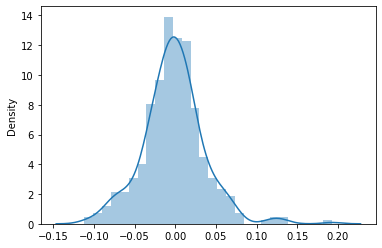

In [83]:
sns.distplot(res)

<AxesSubplot:xlabel='SalePrice'>

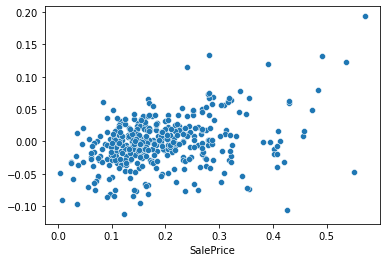

In [84]:
sns.scatterplot(x = y_test, y = res)

Observations: Error terms are randomly scattered around zero mean which is fine, and they are normally distributed also. 

So using the normal linear regression models, we can see some of the problems of the Linear regression models i.e. overfitting due to high number of features, and error terms not having constant variance and probably some auto - correlation too. 

Using the RFE, we have reduced the number of features to 7, while we had 200+ features after creating dummies and 50+ features after the EDA. Let's see if using the regularization technique if we can further improve the model. 

# Ridge and Lasso Regression
Let's now try predicting house prices using the Ridge and Lasso regression

In [85]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        #scoring= 'r2',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
ridge_res = pd.DataFrame(model_cv.cv_results_)
ridge_res = ridge_res[ridge_res['param_alpha']<=10]
ridge_res.head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015716,0.004013,0.006811,0.006100,0.0001,{'alpha': 0.0001},-0.021449,-0.023954,-0.023645,-0.022764,-0.026366,-0.023636,0.001619,24,-0.015978,-0.015814,-0.015869,-0.016653,-0.015199,-0.015902,0.000463
1,0.017138,0.003287,0.005196,0.002782,0.001,{'alpha': 0.001},-0.021450,-0.023947,-0.023641,-0.022739,-0.026348,-0.023625,0.001615,23,-0.015978,-0.015815,-0.015869,-0.016652,-0.015200,-0.015903,0.000462
2,0.009376,0.007655,0.003123,0.006246,0.01,{'alpha': 0.01},-0.021457,-0.023876,-0.023594,-0.022521,-0.026231,-0.023536,0.001596,22,-0.015986,-0.015827,-0.015870,-0.016665,-0.015206,-0.015911,0.000465
3,0.009375,0.007654,0.009371,0.007652,0.05,{'alpha': 0.05},-0.021435,-0.023599,-0.023390,-0.021899,-0.026051,-0.023275,0.001619,20,-0.016006,-0.015868,-0.015878,-0.016735,-0.015230,-0.015943,0.000479
4,0.012500,0.006250,0.006248,0.007652,0.1,{'alpha': 0.1},-0.021373,-0.023337,-0.023168,-0.021508,-0.025893,-0.023056,0.001635,19,-0.016019,-0.015904,-0.015887,-0.016773,-0.015254,-0.015968,0.000484
5,0.012498,0.006249,0.006250,0.007655,0.2,{'alpha': 0.2},-0.021251,-0.023037,-0.022821,-0.021029,-0.025711,-0.022770,0.001677,18,-0.016045,-0.015948,-0.015918,-0.016815,-0.015334,-0.016012,0.000473
6,0.012500,0.006250,0.009373,0.007653,0.3,{'alpha': 0.3},-0.021145,-0.022816,-0.022564,-0.020720,-0.025624,-0.022574,0.001723,17,-0.016071,-0.015977,-0.015946,-0.016852,-0.015400,-0.016049,0.000465
7,0.012501,0.006250,0.006248,0.007652,0.4,{'alpha': 0.4},-0.021059,-0.022655,-0.022373,-0.020532,-0.025556,-0.022435,0.001750,16,-0.016100,-0.015999,-0.015985,-0.016884,-0.015454,-0.016085,0.000459
8,0.012416,0.006210,0.007536,0.009451,0.5,{'alpha': 0.5},-0.021001,-0.022522,-0.022227,-0.020415,-0.025524,-0.022338,0.001771,15,-0.016135,-0.016030,-0.016035,-0.016919,-0.015498,-0.016123,0.000456
9,0.016807,0.002364,0.000999,0.001998,0.6,{'alpha': 0.6},-0.020953,-0.022413,-0.022093,-0.020322,-0.025500,-0.022256,0.001790,13,-0.016174,-0.016066,-0.016092,-0.016953,-0.015539,-0.016165,0.000453


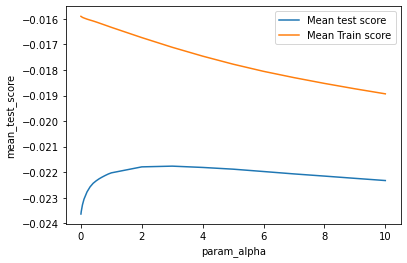

In [87]:
sns.lineplot(data = ridge_res, x = ridge_res['param_alpha'], y = ridge_res['mean_test_score'])
sns.lineplot(data = ridge_res, x = ridge_res['param_alpha'], y = ridge_res['mean_train_score'])
plt.legend(['Mean test score','Mean Train score'],loc='upper right')
plt.show()

#As we can see that the on the test data the error flattens out at around 3.0, this we can choose as the optimal 
#lambda

In [88]:
# Printing the best hyperparameter alpha, let's check what is the best parameter as per the GridSearch, 
print(model_cv.best_params_)

{'alpha': 3.0}


As per Gridsearch also, the optimal value of alpha is 3.0, let's build the model with alpha = 3

In [89]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = 3
ridge_3 = Ridge(alpha=alpha)

ridge_3.fit(X_train, y_train)
print(ridge_3.intercept_)
print(ridge_3.coef_)

0.17691606270473362
[ 5.43498776e-03  3.56509478e-02  9.96160965e-03  7.47985436e-02
  2.93718303e-02  4.05792538e-02  8.13349717e-02  5.23022560e-02
  8.35071187e-02  1.89900874e-02  7.09523077e-03  7.05182903e-03
  2.50619357e-03  1.78532094e-02 -4.62210946e-02 -1.63137439e-02
 -7.07117956e-03  3.18333422e-03 -3.75458094e-03  0.00000000e+00
  4.62167103e-03 -1.20101886e-03  6.89989999e-03 -1.64650249e-03
  4.68851972e-03 -4.90528416e-03 -3.70902762e-03 -1.79128303e-02
 -1.26282128e-02 -1.39817925e-02 -7.37198769e-03 -1.28100660e-02
  1.13779002e-02  8.86231470e-03  1.15382706e-02  6.74873622e-03
 -1.31455356e-03  1.21260580e-03  3.76012763e-04  3.40353501e-03
 -8.09381026e-03 -1.25428730e-02 -3.06663207e-03  0.00000000e+00
  7.17185650e-03  1.19556132e-02 -3.88495859e-03 -7.44096761e-03
  3.12335102e-02 -1.46081657e-02 -9.43809636e-03 -7.74367193e-03
 -1.62218162e-02 -1.51763625e-02 -8.83357061e-03  5.96062712e-03
 -1.60109429e-02  2.24734719e-02  1.19417838e-02 -7.78614910e-03
 -2.4

R2 train: 0.9283487193500302
R2 test: 0.9182352172392529
RSS train: 0.5990813131770354
R2 test: 0.2883457514726075
MSE train: 0.0006605086143076465
MSE test: 0.0007412487184385797


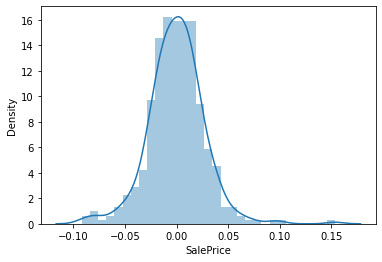

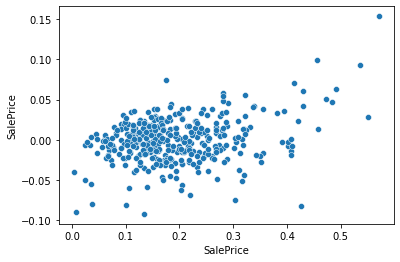

In [90]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_3.predict(X_train)
y_pred_test = ridge_3.predict(X_test)
ridge_3_res = y_test - y_pred_test

metric_ridge_3 = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

sns.distplot(ridge_3_res)
plt.show()
sns.scatterplot(x= y_test, y=ridge_3_res )
plt.show()

# Lasso

In [91]:
params = {'alpha': [0.0001,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
lasso_res = pd.DataFrame(model_cv.cv_results_)
lasso_res = lasso_res[lasso_res['param_alpha']<=.05]
lasso_res.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.062854,0.026842,0.007845,0.006986,0.0001,{'alpha': 0.0001},-0.020077,-0.020222,-0.020881,-0.018780,-0.023676,-0.020727,0.001624,1,-0.016781,-0.017005,-0.016893,-0.017563,-0.016303,-0.016909,0.000405
1,0.015627,0.000004,0.006246,0.007650,0.001,{'alpha': 0.001},-0.024064,-0.025214,-0.028377,-0.023507,-0.028735,-0.025979,0.002178,2,-0.024154,-0.024624,-0.024466,-0.024979,-0.024089,-0.024462,0.000325
2,0.012500,0.006250,0.006249,0.007654,0.01,{'alpha': 0.01},-0.046133,-0.044602,-0.047564,-0.044048,-0.051939,-0.046857,0.002822,3,-0.046931,-0.045372,-0.045470,-0.046817,-0.046042,-0.046126,0.000653
3,0.012500,0.006250,0.006250,0.007654,0.05,{'alpha': 0.05},-0.071891,-0.064128,-0.071578,-0.069054,-0.073670,-0.070064,0.003313,4,-0.069122,-0.071940,-0.069319,-0.070593,-0.068622,-0.069919,0.001201


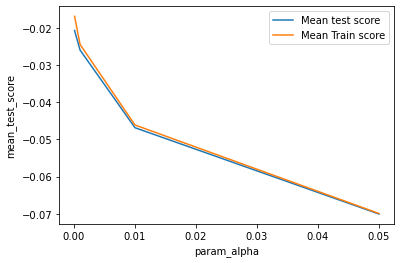

In [93]:
sns.lineplot(data = lasso_res, x = lasso_res['param_alpha'], y = lasso_res['mean_test_score'])
sns.lineplot(data = lasso_res, x = lasso_res['param_alpha'], y = lasso_res['mean_train_score'])
plt.legend(['Mean test score','Mean Train score'],loc='upper right')
plt.show()

In [94]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


Here the optimal value as per the grid search algorithm is 0.0001, if we increase the lambda, more number of features could be eliminated without compromising on the error, let's try that.

In [95]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso_0001 = Lasso(alpha=alpha)
        
lasso_0001.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [96]:
print(lasso_0001.intercept_)
print(lasso_0001.coef_)

#We could see that many co efficents are zero, if we increase the lambda, to 0.0002, then more features could be eliminated

0.10642118981501052
[-0.00000000e+00  3.43471925e-02  6.40220668e-03  1.00045738e-01
  3.98646756e-02  4.83734645e-02  1.22133372e-02  0.00000000e+00
  2.78182455e-01  6.15768483e-03  2.66920220e-03  0.00000000e+00
  2.15256641e-03  1.02695056e-02 -7.29899919e-02 -1.55003563e-02
 -0.00000000e+00  2.57111749e-03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  6.90612403e-03  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.03843835e-02
 -6.76150244e-03 -9.96780801e-03 -0.00000000e+00 -8.06722483e-03
  0.00000000e+00 -0.00000000e+00  4.30052838e-03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.40019648e-03
 -3.81389716e-03 -0.00000000e+00 -2.03833580e-03  0.00000000e+00
  0.00000000e+00  1.78266534e-02  0.00000000e+00 -4.15191536e-04
  3.95312738e-02 -7.36812376e-03 -1.70995483e-03 -0.00000000e+00
 -7.29533357e-03 -6.60345216e-03 -1.76870890e-03  0.00000000e+00
 -8.26817317e-03  1.62416390e-02  1.27112683e-02  0.00000000e+00
 -0.0

R2 train: 0.9293067767074368
R2 test: 0.9164848687834731
RSS train: 0.5910709293490347
R2 test: 0.2945184033623283
MSE train: 0.0006516768791058817
MSE test: 0.0007571167181550857


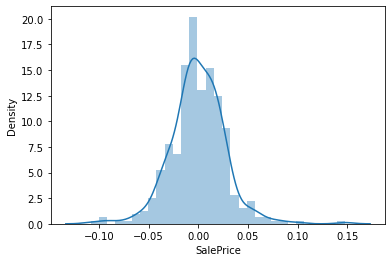

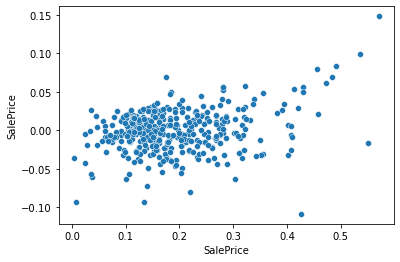

In [97]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_0001.predict(X_train)
y_pred_test = lasso_0001.predict(X_test)

metric_lasso_0001 = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

lasso_0001_res = y_test - y_pred_test

sns.distplot(lasso_0001_res)
plt.show()
sns.scatterplot(x= y_test, y=lasso_0001_res)
plt.show()

In [98]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rfe_metric = pd.Series(metric_rfe, name = 'RFE method')
rg_1_metric = pd.Series(metric_ridge_3, name = 'Ridge Regression (alpha = 3)')
#rg_2_metric = pd.Series(metric_ridge_6, name = 'Ridge Regression 6')
ls_1_metric = pd.Series(metric_lasso_0001, name = 'Lasso Regression (alpha = .0001)')
#ls_2_metric = pd.Series(metric_lasso_0002, name = 'Lasso Regression .0002')

#final_metric = pd.concat([lr_metric,rfe_metric, rg_1_metric,rg_2_metric, ls_1_metric,ls_2_metric], axis = 1)
final_metric = pd.concat([lr_metric,rfe_metric, rg_1_metric, ls_1_metric], axis = 1)

final_metric

,Metric,Linear Regression,RFE method,Ridge Regression (alpha = 3),Lasso Regression (alpha = .0001)
0,R2 Score (Train),9.310177e-01,0.841276,0.928349,0.929307
1,R2 Score (Test),-2.102705e+23,0.839264,0.918235,0.916485
2,RSS (Train),5.767659e-01,1.327099,0.599081,0.591071
3,RSS (Test),7.415247e+23,0.566839,0.288346,0.294518
4,MSE (Train),2.521716e-02,0.038251,0.025700,0.025528
5,MSE (Test),4.366043e+10,0.038173,0.027226,0.027516


As we can see in the above table that of all the models that we have tried, normal Linear regression is the worst performing with a negative R2 on unseen test data, RFE doe's a little better with 83.9% R2, and also reduces the overall error in the model. 
But implementing Ridge and Lasso regularization really improves the overall model. 

If we compare the Ridge (with alpha 3) and Lasso (alpha .0001), both provide very close results as we can see in the table above, but Ridge with alpha = 3 is marginally better in terms of test R2 and overall test error is also slightly lower in Ridge. 

# Lets observe the changes in the coefficients after regularization

In [99]:
df.pop('SalePrice')
betas = pd.DataFrame(index=df.columns)

In [100]:
betas.rows = df.columns

In [101]:
betas['Linear'] = lm.coef_
betas['Ridge_3'] = ridge_3.coef_
#betas['Ridge_6'] = ridge_3.coef_
betas['Lasso_0001'] = lasso_0001.coef_
#betas['Lasso_0002'] = lasso_0002.coef_

In [102]:
betas['Ridge3_abs'] = betas['Ridge_3'].apply(lambda x:abs(x))
#betas['Ridge6_abs'] = betas['Ridge_6'].apply(lambda x:abs(x))
betas['Lasso_0001_abs'] = betas['Lasso_0001'].apply(lambda x:abs(x))
#betas['Lasso_0002_abs'] = betas['Lasso_0002'].apply(lambda x:abs(x))

In [103]:
betas

,Linear,Ridge_3,Lasso_0001,Ridge3_abs,Lasso_0001_abs
LotFrontage,-1.266536e-02,0.005435,-0.000000,0.005435,0.000000
LotArea,3.851682e-02,0.035651,0.034347,0.035651,0.034347
MasVnrArea,8.223985e-03,0.009962,0.006402,0.009962,0.006402
BsmtFinSF1,1.005523e-01,0.074799,0.100046,0.074799,0.100046
BsmtFinSF2,6.011413e-02,0.029372,0.039865,0.029372,0.039865
BsmtUnfSF,6.829210e-02,0.040579,0.048373,0.040579,0.048373
1stFlrSF,7.487079e-02,0.081335,0.012213,0.081335,0.012213
2ndFlrSF,6.720806e-02,0.052302,0.000000,0.052302,0.000000
GrLivArea,1.729789e-01,0.083507,0.278182,0.083507,0.278182
GarageArea,1.070049e-02,0.018990,0.006158,0.018990,0.006158


In [104]:
#Let's find the top 10 features as per Ridge and Lasso
betas_top_10_ridge_3 = betas.sort_values('Ridge3_abs',ascending=False).index[:10]
#betas_top_10_ridge_6 = betas.sort_values('Ridge6_abs',ascending=False).index[:10]
betas_top_10_lasso_0001 = betas.sort_values('Lasso_0001_abs',ascending=False).index[:10]
#betas_top_10_lasso_0002 = betas.sort_values('Lasso_0002_abs',ascending=False).index[:10]

# Let's also build a model without removing too many columns which we did during the EDA to see how the model behaves with large number of features

To do this we will simply apply the data pre-processing steps on the data set and no details EDA will be done, as it is already done.

In [105]:
df = pd.read_csv('train.csv')

In [106]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data cleaning

In [107]:
#Check percentage of null values in each column

null_percent = round(df.isnull().sum()/len(df)*100,2)
missing_data = pd.DataFrame({'column_name':df.columns,'missing_percentage':null_percent})
missing_data

,column_name,missing_percentage
Id,Id,0.00
MSSubClass,MSSubClass,0.00
MSZoning,MSZoning,0.00
LotFrontage,LotFrontage,17.74
LotArea,LotArea,0.00
Street,Street,0.00
Alley,Alley,93.77
LotShape,LotShape,0.00
LandContour,LandContour,0.00
Utilities,Utilities,0.00


In [108]:
#After visual inspection of the comuns that have more than 90% null (NA) values, we found that they are actually not null values,
#NA in this context have some meaning, so we are not dropping these columns, but instead replacing the 'NA' with more meaningful
#value, these columns with current NA values and new values are as below:
# Alley---> NA --->NoAlley
# PoolQC --->NA ---> NoPool
# Fence ---> NA --->NoFence
# MiscFeature --->NA ---> NoMisc
# FireplaceQu ---> NA ---> NoFirePlace
# GarageFinish,GarageCond,GarageYrBlt,GarageQual,GarageType ---> NA ---> NoGarage
# BsmtFinType2, BsmtExposure,BsmtFinType1,BsmtQual,BsmtCond ---> NA ---> NoBsmt

df['Alley'].fillna('NoAlley',inplace = True)
df['PoolQC'].fillna('NoPool',inplace = True)
df['Fence'].fillna('NoFence',inplace = True)
df['MiscFeature'].fillna('NoMisc',inplace = True)
df['FireplaceQu'].fillna('NoFirePlace',inplace = True)
df['GarageFinish'].fillna('NoGarage',inplace = True)
df['GarageCond'].fillna('NoGarage',inplace = True)
df['GarageYrBlt'].fillna(0,inplace = True) #Since its a numerical feature
df['GarageQual'].fillna('NoGarage',inplace = True)
df['GarageType'].fillna('NoGarage',inplace = True)
df['BsmtFinType2'].fillna('NoBsmt',inplace = True)
df['BsmtExposure'].fillna('NoBsmt',inplace = True)
df['BsmtFinType1'].fillna('NoBsmt',inplace = True)
df['BsmtQual'].fillna('NoBsmt',inplace = True)
df['BsmtCond'].fillna('NoBsmt',inplace = True)

In [109]:
#Find and remove the number of rows which has MasVnrType, MasVnrArea or Electrical as null
df = df[~(df['MasVnrType'].isnull() | df['MasVnrArea'].isnull() | df['Electrical'].isnull())]

#It seems like we have only 9 such rows which is 0.6% of the total data, so let's drop these rows

In [110]:
#As we found that there are some outliers in this variable LotFrontage, so let's replace the missing values in this field with the median
#value

df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace = True)

In [111]:
#Categorical Data types
categorical_features = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                        'Neighborhood','Condition1','Condition2','BldgType','HouseStyle', 'OverallQual','OverallCond','RoofStyle','RoofMatl',
                        'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                        'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
                        'Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                        'KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars',
                        'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

#Set the datatype of these columns as categorical
df[categorical_features] = df[categorical_features].astype('category')
#Create a list for numerical features using list comprehension
numerical_features = [x for x in df.columns if x not in categorical_features]
numerical_features

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [112]:
#Drop the id column, as it is of no use for prediction
df.drop('Id',axis = 1,inplace = True)

In [113]:
categorical_features, numerical_features = recalculate_feature_list(df)

Process Numerical variables and outlier treatment

In [114]:
from datetime import date
todays_date = date.today()
#Age of the building
df['PropertyAge'] = todays_date.year - df['YearBuilt']
df['YearsSinceRemodel'] = todays_date.year - df['YearRemodAdd']
df['GarageAge'] = todays_date.year - df['GarageYrBlt']
df['YearsSinceSold'] = todays_date.year - df['YrSold']

In [115]:
#Delete YearBuilt, YearRemodAdd, GarageYrBlt,YrSold and MoSold
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis = 1, inplace = True)
categorical_features, numerical_features = recalculate_feature_list(df)

In [116]:
#Fix GarageAge
df['GarageAge'] = df['GarageAge'].apply(lambda x: x if x!=2022 else 0)

In [117]:
#Lets remove the outlier data based on the LotArea
#Outlier removal function
def remove_outliers(df,col_name):
    q1 = df[col_name].quantile(.25)
    q3 = df[col_name].quantile(.75)
    iqr = q3-q1

    df = df[(df[col_name] > q1-1.5*iqr) & (df[col_name] < q3+1.5*iqr)]
    return df

df = remove_outliers(df,'LotArea')
df = remove_outliers(df,'MasVnrArea')

In [118]:
#Onehot encoding for categorical variables, using the below for loop code
for i in categorical_features:
    #Create dummies 
    temp = pd.get_dummies(df[i],drop_first=True,prefix = i)
    
    #Concat original dataframe with the new encoded datasets
    df = pd.concat([df,temp],axis =1)
    
    #Drop the columns for which dummy variables have been created
    df = df.drop(i,axis =1)

In [119]:
df_train,df_test = train_test_split(df,train_size=0.7, random_state=100)

In [120]:
#Scale the numerical variables

from sklearn.preprocessing import MinMaxScaler

#Instantiate an object

scaler = MinMaxScaler()

# Fit on data (only numeric variables)
num_vars = numerical_features

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,YearsSinceRemodel,GarageAge,YearsSinceSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,Garag

In [121]:
y_train = df_train.pop('SalePrice')
y_test = df_test.pop('SalePrice')
X_train = df_train
X_test = df_test

In [122]:
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,YearsSinceRemodel,GarageAge,YearsSinceSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,Garag

# Ridge

In [123]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        #scoring= 'r2',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [124]:
ridge_res = pd.DataFrame(model_cv.cv_results_)
ridge_res = ridge_res[ridge_res['param_alpha']<=10]
ridge_res.head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026383,0.005882,0.009396,0.000799,0.0001,{'alpha': 0.0001},-0.023351,-0.025024,-0.025789,-0.026841,-0.028490,-0.025899,0.001724,25,-0.013544,-0.013675,-0.013402,-0.014140,-0.013220,-0.013596,0.000311
1,0.021621,0.007355,0.007267,0.007069,0.001,{'alpha': 0.001},-0.023328,-0.025065,-0.025584,-0.026556,-0.028401,-0.025787,0.001675,24,-0.013543,-0.013680,-0.013409,-0.014145,-0.013216,-0.013598,0.000313
2,0.018751,0.006252,0.003126,0.006252,0.01,{'alpha': 0.01},-0.023203,-0.025103,-0.024585,-0.024816,-0.028109,-0.025163,0.001611,23,-0.013573,-0.013714,-0.013471,-0.014200,-0.013218,-0.013635,0.000326
3,0.018749,0.006251,0.006249,0.007653,0.05,{'alpha': 0.05},-0.022810,-0.024613,-0.023588,-0.022720,-0.027463,-0.024239,0.001750,21,-0.013669,-0.013807,-0.013617,-0.014363,-0.013267,-0.013744,0.000357
4,0.018749,0.006250,0.006248,0.007652,0.1,{'alpha': 0.1},-0.022478,-0.024156,-0.023024,-0.022014,-0.026997,-0.023734,0.001781,20,-0.013763,-0.013900,-0.013760,-0.014507,-0.013334,-0.013853,0.000378
5,0.018751,0.006251,0.006249,0.007654,0.2,{'alpha': 0.2},-0.022029,-0.023623,-0.022447,-0.021512,-0.026420,-0.023206,0.001751,19,-0.013912,-0.014069,-0.013960,-0.014720,-0.013444,-0.014021,0.000410
6,0.018113,0.006680,0.012501,0.006251,0.3,{'alpha': 0.3},-0.021733,-0.023299,-0.022106,-0.021323,-0.026072,-0.022906,0.001715,18,-0.014029,-0.014190,-0.014102,-0.014881,-0.013541,-0.014149,0.000430
7,0.019644,0.006057,0.006835,0.008423,0.4,{'alpha': 0.4},-0.021509,-0.023051,-0.021908,-0.021181,-0.025838,-0.022697,0.001692,16,-0.014131,-0.014291,-0.014227,-0.015013,-0.013631,-0.014259,0.000443
8,0.018752,0.006253,0.003126,0.006252,0.5,{'alpha': 0.5},-0.021321,-0.022853,-0.021777,-0.021068,-0.025657,-0.022536,0.001676,15,-0.014218,-0.014388,-0.014335,-0.015125,-0.013715,-0.014356,0.000452
9,0.021874,0.007654,0.006248,0.007652,0.6,{'alpha': 0.6},-0.021172,-0.022700,-0.021688,-0.020977,-0.025500,-0.022408,0.001657,14,-0.014302,-0.014483,-0.014435,-0.015221,-0.013795,-0.014447,0.000457


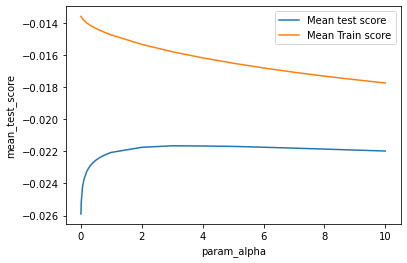

In [125]:
sns.lineplot(data = ridge_res, x = ridge_res['param_alpha'], y = ridge_res['mean_test_score'])
sns.lineplot(data = ridge_res, x = ridge_res['param_alpha'], y = ridge_res['mean_train_score'])
plt.legend(['Mean test score','Mean Train score'],loc='upper right')
plt.show()

#As we can see that the on the test data the error flattens out at around 3.0, this we can choose as the optimal 
#lambda

In [126]:
# Printing the best hyperparameter alpha, let's check what is the best parameter as per the GridSearch, 
print(model_cv.best_params_)

{'alpha': 3.0}


In [127]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = 3
ridge_3_allFeatures = Ridge(alpha=alpha)

ridge_3_allFeatures.fit(X_train, y_train)
print(ridge_3_allFeatures.intercept_)
print(ridge_3_allFeatures.coef_)

0.1576050747989409
[ 2.95588235e-03  3.48978126e-02  9.51707748e-03  5.94331900e-02
  1.47262497e-02  2.13239094e-02  5.92083223e-02  7.51782300e-02
  5.42597096e-02  2.95859204e-03  7.99551508e-02  1.57148371e-02
  7.86577630e-03  6.75522488e-03 -1.86092127e-03  5.36419649e-03
  1.84145710e-02  3.38741980e-02  2.94514977e-03 -3.24282870e-02
 -1.50535336e-02 -4.71168517e-03  1.77781668e-03  5.96774589e-04
  0.00000000e+00  2.02463726e-03 -1.10413567e-03  2.55955204e-03
 -3.84725297e-04  6.18753127e-04 -4.16945647e-03 -3.49071546e-03
 -7.13046282e-03 -4.70221803e-03 -7.28385163e-03 -3.56490090e-03
 -5.23787459e-03  2.92128756e-03  9.74471905e-03  1.29338923e-02
  8.31064245e-03  5.01764145e-03 -1.52917727e-03  8.07955966e-03
  1.01608152e-03 -2.00460010e-03  7.82541215e-04  4.95173950e-03
 -5.12630745e-03 -1.32652374e-03  0.00000000e+00  3.65036565e-03
 -8.60773236e-03 -8.74421705e-03 -4.13165817e-03 -2.56057604e-03
 -1.05782981e-02  0.00000000e+00  6.77707926e-03  8.73018348e-03
 -1.44

R2 train: 0.9403443931400991
R2 test: 0.9253468057124361
RSS train: 0.49878465495392954
R2 test: 0.26326653945459
MSE train: 0.0005499279547452365
MSE test: 0.0006767777363871208


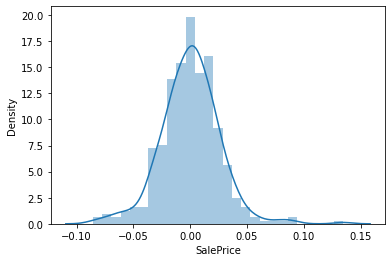

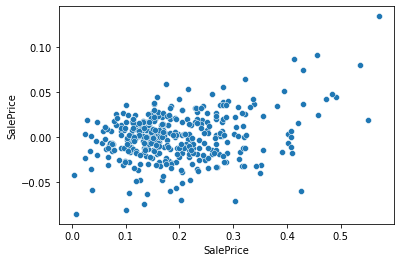

In [128]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_3_allFeatures.predict(X_train)
y_pred_test = ridge_3_allFeatures.predict(X_test)
ridge_3_allFeatures_res = y_test - y_pred_test

metric_ridge_3_allFeatures = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

sns.distplot(ridge_3_allFeatures_res)
plt.show()
sns.scatterplot(x= y_test, y=ridge_3_allFeatures_res )
plt.show()

# Lasso

In [129]:
params = {'alpha': [0.0001,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [130]:
lasso_res = pd.DataFrame(model_cv.cv_results_)
lasso_res = lasso_res[lasso_res['param_alpha']<=.05]
lasso_res.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.086556,0.029507,0.004123,0.006065,0.0001,{'alpha': 0.0001},-0.019753,-0.020291,-0.020947,-0.018324,-0.023094,-0.020482,0.001566,1,-0.015979,-0.015955,-0.016046,-0.016666,-0.015410,-0.016011,0.000399
1,0.021873,0.007656,0.012500,0.006250,0.001,{'alpha': 0.001},-0.022780,-0.024008,-0.027084,-0.022480,-0.027697,-0.024810,0.002177,2,-0.022668,-0.023155,-0.022602,-0.023523,-0.023127,-0.023015,0.000341
2,0.018750,0.006247,0.006249,0.007654,0.01,{'alpha': 0.01},-0.046133,-0.044602,-0.047564,-0.044048,-0.051939,-0.046857,0.002822,3,-0.046931,-0.045372,-0.045470,-0.046817,-0.046042,-0.046126,0.000653
3,0.017496,0.003745,0.007119,0.007124,0.05,{'alpha': 0.05},-0.071891,-0.064128,-0.071578,-0.069054,-0.073670,-0.070064,0.003313,4,-0.069122,-0.071940,-0.069319,-0.070593,-0.068622,-0.069919,0.001201


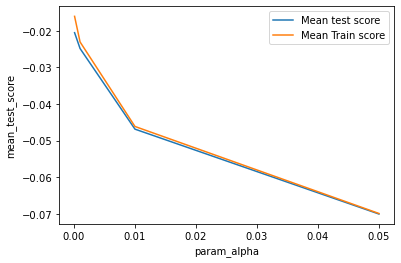

In [131]:
sns.lineplot(data = lasso_res, x = lasso_res['param_alpha'], y = lasso_res['mean_test_score'])
sns.lineplot(data = lasso_res, x = lasso_res['param_alpha'], y = lasso_res['mean_train_score'])
plt.legend(['Mean test score','Mean Train score'],loc='upper right')
plt.show()

In [132]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [133]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso_0001_allFeatures = Lasso(alpha=alpha)
        
lasso_0001_allFeatures.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [134]:
print(lasso_0001_allFeatures.intercept_)
print(lasso_0001_allFeatures.coef_)

#We could see that many co efficents are zero, if we increase the lambda, to 0.0002, then more features could be eliminated

0.09124784855841021
[-0.00000000e+00  3.16398817e-02  5.82289983e-03  4.68253866e-02
  1.32904110e-03 -0.00000000e+00  9.44393373e-02  6.88721198e-03
  0.00000000e+00 -6.78555743e-03  2.94979095e-01  7.64983439e-03
  4.19108455e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.66211025e-03  0.00000000e+00  0.00000000e+00 -5.33070519e-02
 -1.45024463e-02 -0.00000000e+00  6.23179512e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  6.33150566e-03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -1.72942587e-03 -2.09651779e-04 -1.18807909e-03 -0.00000000e+00
 -1.60070356e-03  0.00000000e+00  0.00000000e+00  5.37896820e-03
  0.00000000e+00  0.00000000e+00 -2.84784253e-03  2.60453511e-04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  7.90176802e-06
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  4.28477320e-03
 -2.56957406e-03 -0.00000000e+00 -2.52485518e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  1.54308283e-02
  0.0

R2 train: 0.9372526388780013
R2 test: 0.9239352493769523
RSS train: 0.5246350261762768
R2 test: 0.2682444316296596
MSE train: 0.0005784289152990923
MSE test: 0.0006895743743693049


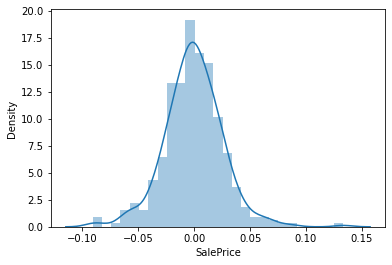

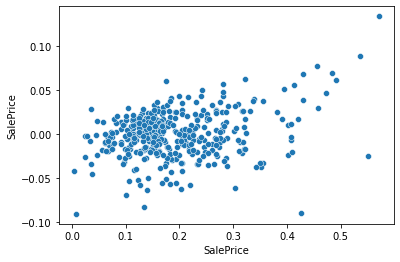

In [135]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_0001_allFeatures.predict(X_train)
y_pred_test = lasso_0001_allFeatures.predict(X_test)

metric_lasso_0001_allFeatures = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

lasso_0001_allFeatures_res = y_test - y_pred_test

sns.distplot(lasso_0001_allFeatures_res)
plt.show()
sns.scatterplot(x= y_test, y=lasso_0001_allFeatures_res)
plt.show()

In [136]:
#Update final metric table

rg_3_metric = pd.Series(metric_ridge_3_allFeatures, name = 'Ridge Regression All Features (alpha = 3)')
ls_3_metric = pd.Series(metric_lasso_0001_allFeatures, name = 'Lasso Regression All features (alpha = .0001)')
final_metric = pd.concat([final_metric,rg_3_metric,ls_3_metric],axis =1)
final_metric

,Metric,Linear Regression,RFE method,Ridge Regression (alpha = 3),Lasso Regression (alpha = .0001),Ridge Regression All Features (alpha = 3),Lasso Regression All features (alpha = .0001)
0,R2 Score (Train),9.310177e-01,0.841276,0.928349,0.929307,0.940344,0.937253
1,R2 Score (Test),-2.102705e+23,0.839264,0.918235,0.916485,0.925347,0.923935
2,RSS (Train),5.767659e-01,1.327099,0.599081,0.591071,0.498785,0.524635
3,RSS (Test),7.415247e+23,0.566839,0.288346,0.294518,0.263267,0.268244
4,MSE (Train),2.521716e-02,0.038251,0.025700,0.025528,0.023451,0.024051
5,MSE (Test),4.366043e+10,0.038173,0.027226,0.027516,0.026015,0.026260


We could see that Ridge and Lasso are performing much better than vanilla Linear regression and RFE models. But even when we performed Ridge and Lasso with high number of features the overall oerformance of the model has improved slightly. 

As we can see in this case that Ridge and Lasso when done with all the features (and minimum feature elimination) has provided best results apprx 92.5% accuracy on the test set and minimum error on the test set (RSS - .263 and .268, MSE - .260 and .262). 

In our case since Ridge and Lasso with all the features is giving the best results, we will select Lasso regression with All features (alpha 0.0001). Another advantage of using Lasso is that we can bring down the number of predictor variables by increasing the lambda value without compromising too much on the error in the model. Using lower number of predictor variable without compromising too much on the errors is a great because it helps to keep the model simple and interpretable. 

# Final Conclusion: Based on the analysis, below are the top 10 models as per the Ridge and Lasso models built with all the features

In [137]:
df.pop('SalePrice')
betas_AllFeatures = pd.DataFrame(index=df.columns)
betas_AllFeatures.rows = df.columns

In [138]:
betas_AllFeatures['Ridge_3_AllFeatures'] = ridge_3_allFeatures.coef_
betas_AllFeatures['Lasso_0001_AllFeatures'] = lasso_0001_allFeatures.coef_

In [139]:
betas_AllFeatures['Ridge_3_AllFeatures_abs'] = betas_AllFeatures['Ridge_3_AllFeatures'].apply(lambda x:abs(x))
betas_AllFeatures['Lasso_0001_AllFeatures_abs'] = betas_AllFeatures['Lasso_0001_AllFeatures'].apply(lambda x:abs(x))

In [140]:
betas_AllFeatures

,Ridge_3_AllFeatures,Lasso_0001_AllFeatures,Ridge_3_AllFeatures_abs,Lasso_0001_AllFeatures_abs
LotFrontage,0.002956,-0.000000,0.002956,0.000000
LotArea,0.034898,0.031640,0.034898,0.031640
MasVnrArea,0.009517,0.005823,0.009517,0.005823
BsmtFinSF1,0.059433,0.046825,0.059433,0.046825
BsmtFinSF2,0.014726,0.001329,0.014726,0.001329
BsmtUnfSF,0.021324,-0.000000,0.021324,0.000000
TotalBsmtSF,0.059208,0.094439,0.059208,0.094439
1stFlrSF,0.075178,0.006887,0.075178,0.006887
2ndFlrSF,0.054260,0.000000,0.054260,0.000000
LowQualFinSF,0.002959,-0.006786,0.002959,0.006786


In [141]:
#Let's find the top 10 features as per Ridge and Lasso
# betas_all_top_10_ridge_3 = betas_AllFeatures.sort_values('Ridge_3_AllFeatures_abs',ascending=False).index[:10]
# betas_all_top_10_lasso_0001 = betas_AllFeatures.sort_values('Lasso_0001_AllFeatures_abs',ascending=False).index[:10]

betas_all_top_10_ridge_3 = betas_AllFeatures.sort_values('Ridge_3_AllFeatures_abs',ascending=False).head(10)
betas_all_top_10_lasso_0001 = betas_AllFeatures.sort_values('Lasso_0001_AllFeatures_abs',ascending=False).head(10)

In [142]:
print(betas_all_top_10_ridge_3['Ridge_3_AllFeatures_abs'])

GrLivArea               0.079955
OverallQual_10          0.078361
1stFlrSF                0.075178
BsmtFinSF1              0.059433
TotalBsmtSF             0.059208
2ndFlrSF                0.054260
Neighborhood_StoneBr    0.039718
PoolQC_NoPool           0.039645
LotArea                 0.034898
FullBath_3              0.034509
Name: Ridge_3_AllFeatures_abs, dtype: float64


Top 10 Features for Ridge with all features (alpha = 3)

'GrLivArea', --->Above grade (ground) living area square feet

'OverallQual_10',---> Rates the overall material and finish of the house, rating is 10 or not?

'1stFlrSF'--> First Floor square feet

'BsmtFinSF1', ---> Type 1 finished square feet

'TotalBsmtSF' --->Total square feet of basement area

'2ndFlrSF' ---> Second floor square feet

'Neighborhood_StoneBr', --->Neighborhood is Stone Brook or not?

'PoolQC_NoPool' ---> If the NoPool is Yes or no? It is negatively correlated i.e. price will be high if a pool is present in the property.

'LotArea' ---> Lot size in square feet

'FullBath_3', ---> Number of full bathrooms are 3 or not


In [143]:
betas_all_top_10_lasso_0001['Lasso_0001_AllFeatures_abs']

GrLivArea               0.294979
OverallQual_10          0.156764
TotalBsmtSF             0.094439
OverallQual_9           0.063531
PropertyAge             0.053307
BsmtFinSF1              0.046825
PoolQC_NoPool           0.040641
Neighborhood_StoneBr    0.035819
Neighborhood_Crawfor    0.035264
OverallQual_8           0.033674
Name: Lasso_0001_AllFeatures_abs, dtype: float64

Top 10 Features for Lasso with all features(alpha = 0.0001)

********************************************************************************
'GrLivArea', --->Above grade (ground) living area square feet

'OverallQual_10',---> Rates the overall material and finish of the house, rating is 10 or not?

'TotalBsmtSF' ---> Total square feet of basement area

'OverallQual_9', ---> Rates the overall material and finish of the house, rating is 9 or not?

'PropertyAge', --->Age of the property, it is negatively correlated.

'BsmtFinSF1', --->Type 1 finished square feet

'PropertyAge', --->Age of the property, it is negatively correlated.

'PoolQC_NoPool' ---> If the NoPool is Yes or no? It is negatively correlated i.e. price will be high if a pool is present in the property. 

'Neighborhood_StoneBr', --->Neighborhood is Stone Brook or not?

'Neighborhood_Crawfor'  --->Neighborhood is Crawfor or not?

'OverallQual_8', ---> Rates the overall material and finish of the house, rating is 8 or not?

Based on our analysis, we have selected lasso regularization with alpha .0001. So our final model will be as follows

In [144]:
op = ''
for i,k in zip(list(betas_AllFeatures['Lasso_0001_AllFeatures_abs']),range(len(betas_AllFeatures.index))):
    if i != 0:    
        op = op + f"{round(i,5)} * {betas_AllFeatures.index[k]} + "

op = f"{round(lasso_0001_allFeatures.intercept_,5)} +" + op
    
print(op[:-2])

0.09125 +0.03164 * LotArea + 0.00582 * MasVnrArea + 0.04683 * BsmtFinSF1 + 0.00133 * BsmtFinSF2 + 0.09444 * TotalBsmtSF + 0.00689 * 1stFlrSF + 0.00679 * LowQualFinSF + 0.29498 * GrLivArea + 0.00765 * GarageArea + 0.00419 * WoodDeckSF + 0.00866 * ScreenPorch + 0.05331 * PropertyAge + 0.0145 * YearsSinceRemodel + 0.00062 * YearsSinceSold + 0.00633 * MSSubClass_60 + 0.00173 * MSSubClass_90 + 0.00021 * MSSubClass_120 + 0.00119 * MSSubClass_160 + 0.0016 * MSSubClass_190 + 0.00538 * MSZoning_RL + 0.00285 * Alley_NoAlley + 0.00026 * Alley_Pave + 1e-05 * LandContour_HLS + 0.00428 * LotConfig_CulDSac + 0.00257 * LotConfig_FR2 + 0.00252 * LotConfig_Inside + 0.01543 * Neighborhood_BrkSide + 0.00141 * Neighborhood_CollgCr + 0.03526 * Neighborhood_Crawfor + 0.0065 * Neighborhood_Edwards + 0.00158 * Neighborhood_Gilbert + 0.0074 * Neighborhood_MeadowV + 0.0078 * Neighborhood_Mitchel + 0.00168 * Neighborhood_NAmes + 0.00595 * Neighborhood_NWAmes + 0.01298 * Neighborhood_NoRidge + 0.00787 * Neighborho

# Subjective question  -1
What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented? 

Lets build the Ridge and Lasso models with all features, by doubling the Alpha value which we got earlier i.e.new alpha for Ridge = 6 and new alpha for Lasso = 0.0002

Ridge (Alpha = 6)

0.1746854132576108
[ 7.40916514e-03  3.28102450e-02  9.70622395e-03  5.25677058e-02
  1.02885165e-02  1.98983870e-02  5.17715817e-02  5.96060270e-02
  4.10070394e-02  1.16207905e-03  6.22387630e-02  1.61083045e-02
  7.16303539e-03  8.90555478e-03 -1.32245526e-03  4.14207945e-03
  1.63598135e-02  2.61265799e-02  1.52011434e-03 -2.15705212e-02
 -1.63620802e-02 -4.53441856e-03  1.96700786e-03 -2.42791131e-03
  0.00000000e+00  1.81665564e-03  5.19563715e-04  3.89830425e-03
  8.32599330e-04  2.14432821e-03 -3.47368021e-03 -3.51383219e-03
 -5.70611763e-03 -3.97930347e-03 -5.99342019e-03 -3.96534944e-03
 -4.67562061e-03  2.11979194e-03  6.17301820e-03  9.92682287e-03
  4.68225432e-03  4.34125891e-03 -9.24197094e-04  8.75594394e-03
  5.77537111e-04 -8.57107478e-04  1.46394434e-04  5.33983104e-03
 -3.12381738e-03 -4.97388106e-04  0.00000000e+00  3.49434937e-03
 -7.15727009e-03 -5.92388422e-03 -3.86535101e-03 -2.57260404e-03
 -6.64356512e-03  0.00000000e+00  6.14024609e-03  8.50179528e-03
 -8.30

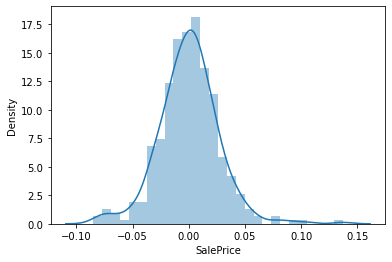

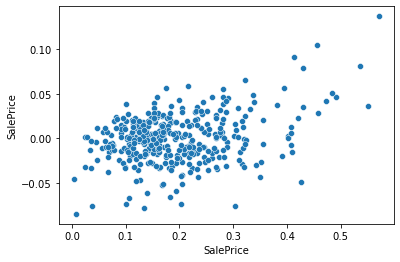

In [145]:
#Fitting Ridge model for alpha = 6 and printing coefficients which have been penalised
alpha = 6
ridge_6_allFeatures = Ridge(alpha=alpha)

ridge_6_allFeatures.fit(X_train, y_train)
print(ridge_6_allFeatures.intercept_)
print(ridge_6_allFeatures.coef_)


# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_6_allFeatures.predict(X_train)
y_pred_test = ridge_6_allFeatures.predict(X_test)
ridge_6_allFeatures_res = y_test - y_pred_test

metric_ridge_6_allFeatures = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

sns.distplot(ridge_6_allFeatures_res)
plt.show()
sns.scatterplot(x= y_test, y=ridge_6_allFeatures_res )
plt.show()

0.06252876483509073
[ 0.00000000e+00  3.29802484e-02  3.33795987e-03  4.95004553e-02
  0.00000000e+00  0.00000000e+00  9.64182107e-02  7.85737603e-03
  0.00000000e+00 -0.00000000e+00  2.81608824e-01  5.34540825e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.79708692e-04  0.00000000e+00  0.00000000e+00 -3.86424998e-02
 -1.72294907e-02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  8.59781105e-03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -9.72020472e-04 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.98765057e-03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -4.16841856e-04  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  2.90600508e-03
 -0.00000000e+00 -0.00000000e+00 -1.80370395e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  1.32420144e-02
  0.0

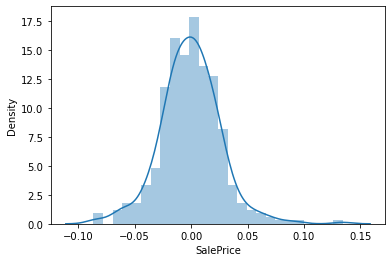

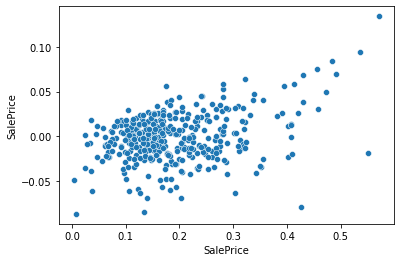

In [146]:
#Fitting Lasso model for alpha = 0.0002 and printing coefficients which have been penalised

alpha =0.0002

lasso_0002_allFeatures = Lasso(alpha=alpha)
        
lasso_0002_allFeatures.fit(X_train, y_train) 

print(lasso_0002_allFeatures.intercept_)
print(lasso_0002_allFeatures.coef_)


# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_0002_allFeatures.predict(X_train)
y_pred_test = lasso_0002_allFeatures.predict(X_test)

metric_lasso_0002_allFeatures = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

lasso_0002_allFeatures_res = y_test - y_pred_test

sns.distplot(lasso_0002_allFeatures_res)
plt.show()
sns.scatterplot(x= y_test, y=lasso_0002_allFeatures_res)
plt.show()

In [147]:
#Update final metric
rg_4_metric = pd.Series(metric_ridge_6_allFeatures, name = 'Ridge Regression All Features (alpha = 6)')
ls_4_metric = pd.Series(metric_lasso_0002_allFeatures, name = 'Lasso Regression All features (alpha = .0002)')

pd.concat([final_metric,rg_4_metric,ls_4_metric],axis =1)

,Metric,Linear Regression,RFE method,Ridge Regression (alpha = 3),Lasso Regression (alpha = .0001),Ridge Regression All Features (alpha = 3),Lasso Regression All features (alpha = .0001),Ridge Regression All Features (alpha = 6),Lasso Regression All features (alpha = .0002)
0,R2 Score (Train),9.310177e-01,0.841276,0.928349,0.929307,0.940344,0.937253,0.931991,0.928618
1,R2 Score (Test),-2.102705e+23,0.839264,0.918235,0.916485,0.925347,0.923935,0.920425,0.920797
2,RSS (Train),5.767659e-01,1.327099,0.599081,0.591071,0.498785,0.524635,0.568632,0.596827
3,RSS (Test),7.415247e+23,0.566839,0.288346,0.294518,0.263267,0.268244,0.280622,0.279312
4,MSE (Train),2.521716e-02,0.038251,0.025700,0.025528,0.023451,0.024051,0.025039,0.025652
5,MSE (Test),4.366043e+10,0.038173,0.027226,0.027516,0.026015,0.026260,0.026859,0.026796


In [148]:
betas_AllFeatures['Ridge_6_AllFeatures'] = ridge_6_allFeatures.coef_
betas_AllFeatures['Lasso_0002_AllFeatures'] = lasso_0002_allFeatures.coef_

#betas_AllFeatures.shape

In [149]:
betas_AllFeatures['Ridge_6_AllFeatures_abs'] = betas_AllFeatures['Ridge_6_AllFeatures'].apply(lambda x:abs(x))
betas_AllFeatures['Lasso_0002_AllFeatures_abs'] = betas_AllFeatures['Lasso_0002_AllFeatures'].apply(lambda x:abs(x))

In [150]:
betas_all_top_10_ridge_6 = betas_AllFeatures.sort_values('Ridge_6_AllFeatures_abs',ascending=False).head(10)
betas_all_top_10_lasso_0002 = betas_AllFeatures.sort_values('Lasso_0002_AllFeatures_abs',ascending=False).head(10)

After the change below are the top 10 variables in the Ridge and Lasso models

In [151]:
print('Ridge (alpha =3)')
print(betas_all_top_10_ridge_3['Ridge_3_AllFeatures_abs'])
print('Ridge (alpha =6)')
print(betas_all_top_10_ridge_6['Ridge_6_AllFeatures_abs'])
print('Ridge (Lasso =.0001)')
print(betas_all_top_10_lasso_0001['Lasso_0001_AllFeatures_abs'])
print('Ridge (Lasso =.0002)')
print(betas_all_top_10_lasso_0002['Lasso_0002_AllFeatures_abs'])

Ridge (alpha =3)
GrLivArea               0.079955
OverallQual_10          0.078361
1stFlrSF                0.075178
BsmtFinSF1              0.059433
TotalBsmtSF             0.059208
2ndFlrSF                0.054260
Neighborhood_StoneBr    0.039718
PoolQC_NoPool           0.039645
LotArea                 0.034898
FullBath_3              0.034509
Name: Ridge_3_AllFeatures_abs, dtype: float64
Ridge (alpha =6)
GrLivArea               0.062239
OverallQual_10          0.059970
1stFlrSF                0.059606
BsmtFinSF1              0.052568
TotalBsmtSF             0.051772
2ndFlrSF                0.041007
Neighborhood_StoneBr    0.033902
FullBath_3              0.033828
LotArea                 0.032810
PoolQC_NoPool           0.030416
Name: Ridge_6_AllFeatures_abs, dtype: float64
Ridge (Lasso =.0001)
GrLivArea               0.294979
OverallQual_10          0.156764
TotalBsmtSF             0.094439
OverallQual_9           0.063531
PropertyAge             0.053307
BsmtFinSF1              0.04

We notice that the top 10 predictor variables are unchanged in the Ridge after doubling the alpha value from 3 to 6, while it has changed in case of Lasso.

# Subjective question  -3 
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Top 10 variables for Lasso (0.0001) models are as follows:

GrLivArea               0.294979

OverallQual_10          0.156764

TotalBsmtSF             0.094439

OverallQual_9           0.063531

PropertyAge             0.053307

BsmtFinSF1              0.046825

PoolQC_NoPool           0.040641

Neighborhood_StoneBr    0.035819

Neighborhood_Crawfor    0.035264

OverallQual_8           0.033674


Now as per the question, top 5 variable are not available and we need to build a new model. So let's drop the top 5 variables from the data and rebuild the model again. Variables to be dropped: 
'GrLivArea', 'OverallQual_10', 'TotalBsmtSF', 'OverallQual_9','PropertyAge'

But we also notice that OverallQual is the categorical variable, since this variable isn't present in the incoming data, we should remove all the corresponding dummy variables related to this predictor variable and rebuild the model again. 

In [152]:
X_train.drop(['GrLivArea', 'TotalBsmtSF', 'PropertyAge','OverallQual_2','OverallQual_3','OverallQual_4',
              'OverallQual_5','OverallQual_6','OverallQual_7','OverallQual_8','OverallQual_9','OverallQual_10'],
             axis =1, inplace = True)

In [153]:
X_test.drop(['GrLivArea', 'TotalBsmtSF', 'PropertyAge','OverallQual_2','OverallQual_3','OverallQual_4',
            'OverallQual_5','OverallQual_6','OverallQual_7','OverallQual_8','OverallQual_9','OverallQual_10'],
            axis =1, inplace = True)

In [154]:
df.drop(['GrLivArea', 'TotalBsmtSF', 'PropertyAge','OverallQual_2','OverallQual_3','OverallQual_4',
         'OverallQual_5','OverallQual_6','OverallQual_7','OverallQual_8','OverallQual_9','OverallQual_10'],
        axis =1, inplace =True)

In [155]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YearsSinceRemodel,GarageAge,YearsSinceSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basmen

In [156]:
params = {'alpha': [0.0001,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [157]:
lasso_res = pd.DataFrame(model_cv.cv_results_)
lasso_res = lasso_res[lasso_res['param_alpha']<=.05]
lasso_res.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.069276,0.032171,0.006997,0.007013,0.0001,{'alpha': 0.0001},-0.020885,-0.022707,-0.021590,-0.020075,-0.024667,-0.021985,0.001595,1,-0.017440,-0.017185,-0.017677,-0.018066,-0.016661,-0.017406,0.000472
1,0.021873,0.007653,0.006250,0.007655,0.001,{'alpha': 0.001},-0.024648,-0.026477,-0.028409,-0.024358,-0.031000,-0.026979,0.002481,2,-0.024770,-0.025371,-0.024503,-0.025533,-0.025704,-0.025176,0.000461
2,0.018749,0.006251,0.000000,0.000000,0.01,{'alpha': 0.01},-0.046133,-0.044602,-0.047564,-0.044048,-0.051939,-0.046857,0.002822,3,-0.046931,-0.045372,-0.045470,-0.046817,-0.046042,-0.046126,0.000653
3,0.018746,0.006249,0.003125,0.006251,0.05,{'alpha': 0.05},-0.071891,-0.064128,-0.071578,-0.069054,-0.073670,-0.070064,0.003313,4,-0.069122,-0.071940,-0.069319,-0.070593,-0.068622,-0.069919,0.001201


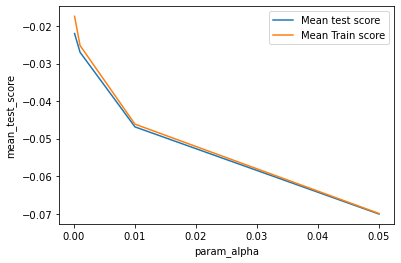

In [158]:
sns.lineplot(data = lasso_res, x = lasso_res['param_alpha'], y = lasso_res['mean_test_score'])
sns.lineplot(data = lasso_res, x = lasso_res['param_alpha'], y = lasso_res['mean_train_score'])
plt.legend(['Mean test score','Mean Train score'],loc='upper right')
plt.show()

In [159]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [160]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso_final = Lasso(alpha=alpha)
        
lasso_final.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [161]:
print(lasso_final.intercept_)
print(lasso_final.coef_)

0.11506027646778047
[ 0.00000000e+00  3.52309716e-02  5.89373840e-03  1.07048592e-01
  4.54110925e-02  5.48092740e-02  2.42441887e-01  1.50226692e-01
  0.00000000e+00  1.72836570e-02  1.36577524e-03  7.20349637e-04
 -0.00000000e+00  0.00000000e+00  1.00174892e-02  0.00000000e+00
  0.00000000e+00 -1.54600949e-02 -9.88594937e-03  0.00000000e+00
 -1.34030768e-04  0.00000000e+00  0.00000000e+00 -4.62406668e-04
  8.17178737e-03 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -5.12225843e-03 -2.45360306e-03 -0.00000000e+00
 -0.00000000e+00 -3.76141320e-03  0.00000000e+00  0.00000000e+00
  5.68581266e-03 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.20030516e-03 -0.00000000e+00 -0.00000000e+00  1.29774306e-04
  8.44796583e-03 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  4.44608614e-03 -8.71398910e-04 -0.00000000e+00 -1.56331738e-03
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.12621336e-02  0.00000000e+00  0.00000000e+00  2.73093014e-02
 -8.7

R2 train: 0.9272540125342503
R2 test: 0.9157577287725094
RSS train: 0.608234232577668
R2 test: 0.2970826825765307
MSE train: 0.0006706000359180462
MSE test: 0.0007637086955694876


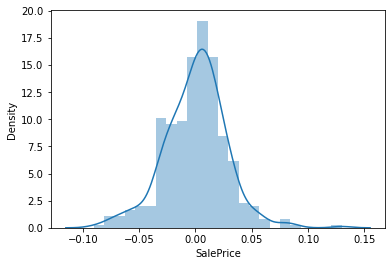

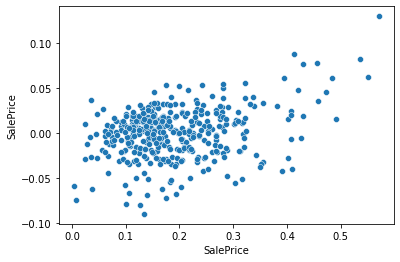

In [162]:
y_pred_train = lasso_final.predict(X_train)
y_pred_test = lasso_final.predict(X_test)

metric_lasso_final = calculate_metrices(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test)

lasso_final_res = y_test - y_pred_test

sns.distplot(lasso_final_res)
plt.show()
sns.scatterplot(x= y_test, y=lasso_final_res)
plt.show()

In [163]:
#df.drop(['GrLivArea', 'BsmtFinSF1', 'OverallQual_10', 'PropertyAge','OverallQual_9'],axis =1, inplace = True)
betas_final = pd.DataFrame(index=df.columns)
betas_final.rows = df.columns
betas_final['Lasso_0001'] = lasso_final.coef_
betas_final['Lasso_0001_abs'] = betas_final['Lasso_0001'].apply(lambda x:abs(x))

In [164]:
betas_final.sort_values('Lasso_0001_abs',ascending=False)

,Lasso_0001,Lasso_0001_abs
1stFlrSF,0.242442,0.242442
2ndFlrSF,0.150227,0.150227
BsmtFinSF1,0.107049,0.107049
PoolQC_NoPool,-0.070649,0.070649
BsmtUnfSF,0.054809,0.054809
Neighborhood_StoneBr,0.052511,0.052511
BsmtFinSF2,0.045411,0.045411
FullBath_3,0.040018,0.040018
LotArea,0.035231,0.035231
BsmtQual_TA,-0.030132,0.030132


In [165]:
betas_final_top_10_lasso_0001 = betas_final.sort_values('Lasso_0001_abs',ascending=False).head(10)

In [166]:
betas_final_top_10_lasso_0001

,Lasso_0001,Lasso_0001_abs
1stFlrSF,0.242442,0.242442
2ndFlrSF,0.150227,0.150227
BsmtFinSF1,0.107049,0.107049
PoolQC_NoPool,-0.070649,0.070649
BsmtUnfSF,0.054809,0.054809
Neighborhood_StoneBr,0.052511,0.052511
BsmtFinSF2,0.045411,0.045411
FullBath_3,0.040018,0.040018
LotArea,0.035231,0.035231
BsmtQual_TA,-0.030132,0.030132


After remodelling the new top 5 features are '1stFlrSF', '2ndFlrSF','BsmtFinSF1','PoolQC_NoPool','BsmtUnfSF'